In [1]:
### import manually defined automata
%matplotlib inline
from csrl.pomdp import GridPOMDP
from csrl.oaa import oaa
from csrl import ControlSynthesis
import numpy as np 

oa=oaa()

# LTL Specification
#ltl = 'GF(a & Fb) & G!c' ### goes to 'a' then 'b' recurrently, gallobly ! c
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

print('Initial state:',oa.q0)
print('Transition function: ['),print(*['  '+str(t) for t in oa.delta],sep=',\n'),print(']')
print('Acceptance: ['),print(*['  '+str(t) for t in oa.acc],sep=',\n'),print(']')

Number of Omega-automaton states (including the trap state): 3


Initial state: 0
Transition function: [
  {(): 0, ('a',): 1, ('b',): 0, ('c',): 2, ('a', 'b'): 0, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2},
  {(): 1, ('a',): 1, ('b',): 0, ('c',): 2, ('a', 'b'): 0, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2},
  {(): 2, ('a',): 2, ('b',): 2, ('c',): 2, ('a', 'b'): 2, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2}
]
Acceptance: [
  {(): [None], ('a',): [True], ('b',): [None], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]},
  {(): [None], ('a',): [None], ('b',): [True], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]},
  {(): [None], ('a',): [None], ('b',): [None], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]}
]


(None, None, None)

In [2]:
# POMDP Description
shape = (10,10)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
['B',  'B',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['B',  'B',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'B',  'B'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'B',  'B']
])

# Labels of the states
label = np.array([
[(),       (),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[(),       (),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       ('c',),       ('c',),       (),       (),       (),       ()],
[(),       (),       (),       (),       ('c',),       ('c',),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()]
],dtype=np.object)
# Colors of the labels
lcmap={
    ('a',):'lightgreen',
    ('b',):'lightgreen',
    ('c',):'pink'
}
grid_pomdp = GridPOMDP(shape=shape,structure=structure,label=label,lcmap=lcmap,figsize=5)  # Use figsize=4 for smaller figures

# Construct the product MDP
csrl = ControlSynthesis(grid_pomdp,oa)

C:\Users\JUNCHA~1\AppData\Local\Temp/ipykernel_8712/1065089555.py:29: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ],dtype=np.object)


In [3]:
csrl.reward

array([[[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0

In [4]:
csrl.A

array([[[[list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([

In [5]:
 t2, epsilon, average_accumulated_rewards = csrl.train_DRQN(EPISODES=15000, num_steps=600, batch_size=32, weights_update=50, state_sequence_size=5, label_sequence_size=3)

D:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


START state: (0, 0, 9, 5)
episode: 0/15000, steps: 52, e: 1.0
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 5)


D:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


episode: 1/15000, steps: 180, e: 1.0
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 6)
episode: 2/15000, steps: 265, e: 1.0
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 3, 2)
episode: 3/15000, steps: 52, e: 1.0
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 3)
episode: 4/15000, steps: 182, e: 1.0
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 1, 7)
episode: 5/15000, steps: 180, e: 1.0
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 2, 6)
episode: 6/15000, steps: 52, e: 1.0
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 0)
episode: 7/15000, steps: 52, e: 0.99
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 7, 3)
episode: 8/15000, steps: 52, e: 0.99
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 1)
episode: 9/15000, steps: 52, e: 0.99
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 6, 8)
episode: 10/15000, steps: 83, e: 0.99
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5,

episode: 83/15000, steps: 52, e: 0.94
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 8)
episode: 84/15000, steps: 70, e: 0.94
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 4)
episode: 85/15000, steps: 52, e: 0.93
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 5)
episode: 86/15000, steps: 52, e: 0.93
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5, 3)
episode: 87/15000, steps: 52, e: 0.93
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 5)
episode: 88/15000, steps: 129, e: 0.93
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 7)
episode: 89/15000, steps: 76, e: 0.93
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 1)
episode: 90/15000, steps: 52, e: 0.93
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 2)
episode: 91/15000, steps: 52, e: 0.93
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 0, 8)
episode: 92/15000, steps: 152, e: 0.93
accumulated_rewards_per_episode: 0.0
START state:

episode: 164/15000, steps: 446, e: 0.88
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5, 9)
episode: 165/15000, steps: 52, e: 0.88
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 4)
episode: 166/15000, steps: 90, e: 0.88
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 7, 7)
episode: 167/15000, steps: 52, e: 0.87
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 9)
episode: 168/15000, steps: 52, e: 0.87
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 8)
episode: 169/15000, steps: 62, e: 0.87
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 6)
episode: 170/15000, steps: 199, e: 0.87
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 2, 6)
episode: 171/15000, steps: 52, e: 0.87
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 2)
episode: 172/15000, steps: 90, e: 0.87
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 3, 2)
episode: 173/15000, steps: 161, e: 0.87
accumulated_rewards_per_episode: 0.0


episode: 245/15000, steps: 52, e: 0.82
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 5)
episode: 246/15000, steps: 52, e: 0.82
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 7)
episode: 247/15000, steps: 91, e: 0.82
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 7, 2)
episode: 248/15000, steps: 80, e: 0.82
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 3, 6)
episode: 249/15000, steps: 52, e: 0.82
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 2)
episode: 250/15000, steps: 52, e: 0.82
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 1)
episode: 251/15000, steps: 52, e: 0.82
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 2)
episode: 252/15000, steps: 212, e: 0.82
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 9, 5)
episode: 253/15000, steps: 52, e: 0.82
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 2, 9)
episode: 254/15000, steps: 118, e: 0.82
accumulated_rewards_per_episode: 0.0


episode: 326/15000, steps: 239, e: 0.77
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 5, 8)
episode: 327/15000, steps: 182, e: 0.77
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 9)
episode: 328/15000, steps: 365, e: 0.77
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 5, 2)
episode: 329/15000, steps: 71, e: 0.77
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 5, 0)
episode: 330/15000, steps: 52, e: 0.77
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5, 9)
episode: 331/15000, steps: 63, e: 0.77
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 8)
episode: 332/15000, steps: 66, e: 0.77
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 2)
episode: 333/15000, steps: 52, e: 0.77
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 8)
episode: 334/15000, steps: 52, e: 0.77
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 2)
episode: 335/15000, steps: 204, e: 0.76
accumulated_rewards_per_episode: 10.

episode: 406/15000, steps: 268, e: 0.72
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 5, 0)
episode: 407/15000, steps: 284, e: 0.72
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 3, 4)
episode: 408/15000, steps: 52, e: 0.72
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 5)
episode: 409/15000, steps: 52, e: 0.72
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 3)
episode: 410/15000, steps: 64, e: 0.72
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 0, 9)
episode: 411/15000, steps: 320, e: 0.72
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 6, 5)
episode: 412/15000, steps: 52, e: 0.72
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 2)
episode: 413/15000, steps: 278, e: 0.72
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 1, 9)
episode: 414/15000, steps: 52, e: 0.72
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 9)
episode: 415/15000, steps: 537, e: 0.72
accumulated_rewards_per_episode: 

episode: 487/15000, steps: 52, e: 0.68
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 1, 2)
episode: 488/15000, steps: 584, e: 0.68
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 2, 3)
episode: 489/15000, steps: 65, e: 0.68
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 2, 7)
episode: 490/15000, steps: 85, e: 0.68
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 3)
episode: 491/15000, steps: 52, e: 0.68
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 0)
episode: 492/15000, steps: 52, e: 0.67
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 6)
episode: 493/15000, steps: 103, e: 0.67
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 3, 5)
episode: 494/15000, steps: 52, e: 0.67
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5, 7)
episode: 495/15000, steps: 52, e: 0.67
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 4)
episode: 496/15000, steps: 56, e: 0.67
accumulated_rewards_per_episode: 10.0

episode: 567/15000, steps: 276, e: 0.64
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 8, 3)
episode: 568/15000, steps: 52, e: 0.63
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 5, 0)
episode: 569/15000, steps: 77, e: 0.63
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 5, 8)
episode: 570/15000, steps: 52, e: 0.63
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 0)
episode: 571/15000, steps: 52, e: 0.63
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 3)
episode: 572/15000, steps: 52, e: 0.63
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 1)
episode: 573/15000, steps: 96, e: 0.63
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 4, 8)
episode: 574/15000, steps: 86, e: 0.63
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 3, 3)
episode: 575/15000, steps: 52, e: 0.63
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 4, 1)
episode: 576/15000, steps: 147, e: 0.63
accumulated_rewards_per_episode: 10

episode: 647/15000, steps: 92, e: 0.6
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 0, 6)
episode: 648/15000, steps: 600, e: 0.6
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 1, 2)
episode: 649/15000, steps: 600, e: 0.59
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 0, 7)
episode: 650/15000, steps: 115, e: 0.59
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 2, 7)
episode: 651/15000, steps: 52, e: 0.59
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 4)
episode: 652/15000, steps: 600, e: 0.59
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 6, 2)
episode: 653/15000, steps: 167, e: 0.59
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 4, 2)
episode: 654/15000, steps: 52, e: 0.59
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 8, 1)
episode: 655/15000, steps: 126, e: 0.59
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 9, 7)
episode: 656/15000, steps: 52, e: 0.59
accumulated_rewards_per_episode

episode: 727/15000, steps: 122, e: 0.56
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 8, 2)
episode: 728/15000, steps: 230, e: 0.56
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 0, 6)
episode: 729/15000, steps: 113, e: 0.56
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 9, 3)
episode: 730/15000, steps: 456, e: 0.56
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 4)
episode: 731/15000, steps: 52, e: 0.56
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 2)
episode: 732/15000, steps: 52, e: 0.56
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 6)
episode: 733/15000, steps: 600, e: 0.56
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 4, 7)
episode: 734/15000, steps: 52, e: 0.56
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 7)
episode: 735/15000, steps: 52, e: 0.56
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 8)
episode: 736/15000, steps: 337, e: 0.55
accumulated_rewards_per_episode:

episode: 807/15000, steps: 277, e: 0.52
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 3, 9)
episode: 808/15000, steps: 53, e: 0.52
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5, 1)
episode: 809/15000, steps: 600, e: 0.52
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 6, 4)
episode: 810/15000, steps: 600, e: 0.52
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 4, 3)
episode: 811/15000, steps: 52, e: 0.52
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 2)
episode: 812/15000, steps: 52, e: 0.52
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 6)
episode: 813/15000, steps: 52, e: 0.52
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 4)
episode: 814/15000, steps: 567, e: 0.52
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 4, 8)
episode: 815/15000, steps: 219, e: 0.52
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 0, 3)
episode: 816/15000, steps: 84, e: 0.52
accumulated_rewards_per_episode: 

episode: 887/15000, steps: 106, e: 0.49
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 9, 0)
episode: 888/15000, steps: 52, e: 0.49
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 2)
episode: 889/15000, steps: 119, e: 0.49
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 5)
episode: 890/15000, steps: 52, e: 0.49
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 2)
episode: 891/15000, steps: 600, e: 0.49
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 4)
episode: 892/15000, steps: 580, e: 0.49
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 3, 5)
episode: 893/15000, steps: 52, e: 0.49
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 5)
episode: 894/15000, steps: 600, e: 0.49
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 1, 8)
episode: 895/15000, steps: 325, e: 0.49
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 6, 8)
episode: 896/15000, steps: 600, e: 0.49
accumulated_rewards_per_episode

episode: 967/15000, steps: 135, e: 0.46
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 7, 7)
episode: 968/15000, steps: 600, e: 0.46
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 6, 7)
episode: 969/15000, steps: 542, e: 0.46
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 3, 5)
episode: 970/15000, steps: 600, e: 0.46
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 7, 4)
episode: 971/15000, steps: 600, e: 0.46
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 7)
episode: 972/15000, steps: 600, e: 0.46
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 0)
episode: 973/15000, steps: 600, e: 0.46
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 5)
episode: 974/15000, steps: 54, e: 0.46
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 6)
episode: 975/15000, steps: 345, e: 0.46
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 0, 5)
episode: 976/15000, steps: 319, e: 0.46
accumulated_rewards_per_ep

episode: 1046/15000, steps: 600, e: 0.43
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 8, 6)
episode: 1047/15000, steps: 600, e: 0.43
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 8, 5)
episode: 1048/15000, steps: 52, e: 0.43
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 1, 6)
episode: 1049/15000, steps: 383, e: 0.43
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 5, 2)
episode: 1050/15000, steps: 206, e: 0.43
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 0, 6)
episode: 1051/15000, steps: 121, e: 0.43
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 5, 8)
episode: 1052/15000, steps: 52, e: 0.43
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 2, 0)
episode: 1053/15000, steps: 252, e: 0.43
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 9, 2)
episode: 1054/15000, steps: 467, e: 0.43
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 6, 3)
episode: 1055/15000, steps: 600, e: 0.43
accumulated_rewa

episode: 1125/15000, steps: 321, e: 0.41
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 0, 8)
episode: 1126/15000, steps: 600, e: 0.41
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 4, 7)
episode: 1127/15000, steps: 52, e: 0.41
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 7)
episode: 1128/15000, steps: 109, e: 0.41
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 5)
episode: 1129/15000, steps: 349, e: 0.41
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 5, 3)
episode: 1130/15000, steps: 448, e: 0.4
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 3, 9)
episode: 1131/15000, steps: 600, e: 0.4
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 4, 2)
episode: 1132/15000, steps: 600, e: 0.4
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 7, 9)
episode: 1133/15000, steps: 139, e: 0.4
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 3, 1)
episode: 1134/15000, steps: 600, e: 0.4
accumulated_rewards_pe

episode: 1204/15000, steps: 266, e: 0.38
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 7, 0)
episode: 1205/15000, steps: 600, e: 0.38
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 7, 8)
episode: 1206/15000, steps: 600, e: 0.38
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 7, 9)
episode: 1207/15000, steps: 600, e: 0.38
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 8, 2)
episode: 1208/15000, steps: 600, e: 0.38
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 5, 9)
episode: 1209/15000, steps: 266, e: 0.38
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 7, 1)
episode: 1210/15000, steps: 600, e: 0.38
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 3, 1)
episode: 1211/15000, steps: 385, e: 0.38
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 3, 1)
episode: 1212/15000, steps: 600, e: 0.38
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 0, 2)
episode: 1213/15000, steps: 600, e: 0.38
accumulated_re

episode: 1283/15000, steps: 600, e: 0.36
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 3, 3)
episode: 1284/15000, steps: 73, e: 0.36
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 4, 0)
episode: 1285/15000, steps: 600, e: 0.36
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 2)
episode: 1286/15000, steps: 600, e: 0.36
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 8, 5)
episode: 1287/15000, steps: 600, e: 0.36
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 9)
episode: 1288/15000, steps: 600, e: 0.36
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 0, 3)
episode: 1289/15000, steps: 469, e: 0.36
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 7, 5)
episode: 1290/15000, steps: 600, e: 0.36
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 9, 4)
episode: 1291/15000, steps: 444, e: 0.36
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 4, 6)
episode: 1292/15000, steps: 52, e: 0.36
accumulated_rewa

episode: 1362/15000, steps: 596, e: 0.34
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 9, 3)
episode: 1363/15000, steps: 130, e: 0.34
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 9, 7)
episode: 1364/15000, steps: 408, e: 0.34
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 7)
episode: 1365/15000, steps: 565, e: 0.34
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 6, 8)
episode: 1366/15000, steps: 168, e: 0.34
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 9)
episode: 1367/15000, steps: 600, e: 0.34
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 6, 1)
episode: 1368/15000, steps: 600, e: 0.33
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 5, 3)
episode: 1369/15000, steps: 52, e: 0.33
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5, 2)
episode: 1370/15000, steps: 600, e: 0.33
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 0, 8)
episode: 1371/15000, steps: 600, e: 0.33
accumulated_reward

episode: 1441/15000, steps: 466, e: 0.32
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 2)
episode: 1442/15000, steps: 600, e: 0.32
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 4, 1)
episode: 1443/15000, steps: 600, e: 0.32
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 9, 0)
episode: 1444/15000, steps: 259, e: 0.31
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 1)
episode: 1445/15000, steps: 600, e: 0.31
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 3, 3)
episode: 1446/15000, steps: 52, e: 0.31
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 5)
episode: 1447/15000, steps: 600, e: 0.31
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 2, 5)
episode: 1448/15000, steps: 52, e: 0.31
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 2)
episode: 1449/15000, steps: 600, e: 0.31
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 6, 1)
episode: 1450/15000, steps: 182, e: 0.31
accumulated_rewards_

episode: 1520/15000, steps: 600, e: 0.3
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 2, 2)
episode: 1521/15000, steps: 600, e: 0.3
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 5, 1)
episode: 1522/15000, steps: 256, e: 0.3
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 0, 8)
episode: 1523/15000, steps: 52, e: 0.3
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 7)
episode: 1524/15000, steps: 600, e: 0.3
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 3, 9)
episode: 1525/15000, steps: 52, e: 0.3
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 7)
episode: 1526/15000, steps: 160, e: 0.29
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 3, 3)
episode: 1527/15000, steps: 59, e: 0.29
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 3, 0)
episode: 1528/15000, steps: 66, e: 0.29
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 1, 2)
episode: 1529/15000, steps: 52, e: 0.29
accumulated_rewards_per_epi

episode: 1599/15000, steps: 600, e: 0.28
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 0, 3)
episode: 1600/15000, steps: 600, e: 0.28
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 0, 5)
episode: 1601/15000, steps: 52, e: 0.28
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 8)
episode: 1602/15000, steps: 600, e: 0.28
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 5)
episode: 1603/15000, steps: 52, e: 0.28
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 0)
episode: 1604/15000, steps: 600, e: 0.28
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 0)
episode: 1605/15000, steps: 600, e: 0.28
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 2, 6)
episode: 1606/15000, steps: 600, e: 0.28
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 0)
episode: 1607/15000, steps: 52, e: 0.28
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 4, 7)
episode: 1608/15000, steps: 373, e: 0.28
accumulated_rewards_

episode: 1678/15000, steps: 600, e: 0.26
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 2, 1)
episode: 1679/15000, steps: 600, e: 0.26
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 7, 2)
episode: 1680/15000, steps: 600, e: 0.26
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 6, 0)
episode: 1681/15000, steps: 316, e: 0.26
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 1, 2)
episode: 1682/15000, steps: 600, e: 0.26
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 2, 7)
episode: 1683/15000, steps: 600, e: 0.26
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 8, 5)
episode: 1684/15000, steps: 52, e: 0.26
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 1)
episode: 1685/15000, steps: 600, e: 0.26
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 5, 1)
episode: 1686/15000, steps: 600, e: 0.26
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 5, 6)
episode: 1687/15000, steps: 52, e: 0.26
accumulated_rewar

episode: 1757/15000, steps: 600, e: 0.25
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 6, 4)
episode: 1758/15000, steps: 52, e: 0.25
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 4)
episode: 1759/15000, steps: 52, e: 0.24
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 8)
episode: 1760/15000, steps: 600, e: 0.24
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 6, 5)
episode: 1761/15000, steps: 600, e: 0.24
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 9, 2)
episode: 1762/15000, steps: 600, e: 0.24
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 7, 2)
episode: 1763/15000, steps: 600, e: 0.24
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 7, 0)
episode: 1764/15000, steps: 600, e: 0.24
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 0, 9)
episode: 1765/15000, steps: 600, e: 0.24
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 3, 7)
episode: 1766/15000, steps: 590, e: 0.24
accumulated_reward

episode: 1837/15000, steps: 600, e: 0.23
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 5, 8)
episode: 1838/15000, steps: 600, e: 0.23
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 3, 6)
episode: 1839/15000, steps: 52, e: 0.23
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 2)
episode: 1840/15000, steps: 256, e: 0.23
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 0, 7)
episode: 1841/15000, steps: 600, e: 0.23
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 9, 4)
episode: 1842/15000, steps: 600, e: 0.23
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 3, 4)
episode: 1843/15000, steps: 52, e: 0.23
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 5)
episode: 1844/15000, steps: 600, e: 0.23
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 3, 8)
episode: 1845/15000, steps: 600, e: 0.23
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 9, 0)
episode: 1846/15000, steps: 600, e: 0.23
accumulated_reward

episode: 1916/15000, steps: 600, e: 0.22
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 1, 9)
episode: 1917/15000, steps: 600, e: 0.22
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 8, 4)
episode: 1918/15000, steps: 600, e: 0.22
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 3)
episode: 1919/15000, steps: 149, e: 0.22
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 4)
episode: 1920/15000, steps: 600, e: 0.22
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 3, 1)
episode: 1921/15000, steps: 600, e: 0.22
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 3, 4)
episode: 1922/15000, steps: 52, e: 0.21
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 2)
episode: 1923/15000, steps: 600, e: 0.21
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 8, 0)
episode: 1924/15000, steps: 600, e: 0.21
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 9, 0)
episode: 1925/15000, steps: 600, e: 0.21
accumulated_rewar

episode: 1996/15000, steps: 600, e: 0.2
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 1)
episode: 1997/15000, steps: 600, e: 0.2
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 2, 0)
episode: 1998/15000, steps: 600, e: 0.2
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 1, 5)
episode: 1999/15000, steps: 600, e: 0.2
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 0, 8)
episode: 2000/15000, steps: 600, e: 0.2
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 4, 2)
episode: 2001/15000, steps: 248, e: 0.2
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 2, 1)
episode: 2002/15000, steps: 600, e: 0.2
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 3, 6)
episode: 2003/15000, steps: 600, e: 0.2
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 8, 3)
episode: 2004/15000, steps: 600, e: 0.2
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 3)
episode: 2005/15000, steps: 52, e: 0.2
accumulated_rewards_per_ep

episode: 2075/15000, steps: 600, e: 0.19
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 3, 3)
episode: 2076/15000, steps: 356, e: 0.19
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 6, 3)
episode: 2077/15000, steps: 600, e: 0.19
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 4, 0)
episode: 2078/15000, steps: 600, e: 0.19
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 7, 4)
episode: 2079/15000, steps: 52, e: 0.19
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 5, 1)
episode: 2080/15000, steps: 105, e: 0.19
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 5, 9)
episode: 2081/15000, steps: 600, e: 0.19
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 8, 6)
episode: 2082/15000, steps: 74, e: 0.19
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 2, 1)
episode: 2083/15000, steps: 223, e: 0.19
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 1, 3)
episode: 2084/15000, steps: 52, e: 0.19
accumulated_rewar

episode: 2154/15000, steps: 439, e: 0.18
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 9, 6)
episode: 2155/15000, steps: 600, e: 0.18
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 5, 7)
episode: 2156/15000, steps: 83, e: 0.18
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 6, 3)
episode: 2157/15000, steps: 52, e: 0.18
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 6)
episode: 2158/15000, steps: 600, e: 0.18
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 5, 1)
episode: 2159/15000, steps: 600, e: 0.18
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 8, 2)
episode: 2160/15000, steps: 600, e: 0.18
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 2, 2)
episode: 2161/15000, steps: 600, e: 0.18
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 8, 2)
episode: 2162/15000, steps: 394, e: 0.18
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 5, 9)
episode: 2163/15000, steps: 470, e: 0.18
accumulated_rewa

episode: 2233/15000, steps: 600, e: 0.17
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 6, 8)
episode: 2234/15000, steps: 600, e: 0.17
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 4, 0)
episode: 2235/15000, steps: 600, e: 0.17
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 9, 3)
episode: 2236/15000, steps: 600, e: 0.17
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 1, 9)
episode: 2237/15000, steps: 600, e: 0.17
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 6, 6)
episode: 2238/15000, steps: 52, e: 0.17
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 3)
episode: 2239/15000, steps: 600, e: 0.17
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 5, 8)
episode: 2240/15000, steps: 134, e: 0.17
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 9, 0)
episode: 2241/15000, steps: 600, e: 0.17
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 1, 2)
episode: 2242/15000, steps: 600, e: 0.17
accumulated_rewa

episode: 2312/15000, steps: 52, e: 0.16
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 1)
episode: 2313/15000, steps: 240, e: 0.16
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 1)
episode: 2314/15000, steps: 600, e: 0.16
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 0, 8)
episode: 2315/15000, steps: 362, e: 0.16
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 9, 0)
episode: 2316/15000, steps: 108, e: 0.16
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 5)
episode: 2317/15000, steps: 52, e: 0.16
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 1)
episode: 2318/15000, steps: 600, e: 0.16
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 9, 4)
episode: 2319/15000, steps: 53, e: 0.16
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 7, 4)
episode: 2320/15000, steps: 600, e: 0.16
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 9, 1)
episode: 2321/15000, steps: 600, e: 0.16
accumulated_rewards_

episode: 2391/15000, steps: 600, e: 0.15
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 2, 0)
episode: 2392/15000, steps: 382, e: 0.15
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 1, 5)
episode: 2393/15000, steps: 600, e: 0.15
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 7, 8)
episode: 2394/15000, steps: 600, e: 0.15
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 3, 1)
episode: 2395/15000, steps: 600, e: 0.15
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 3, 7)
episode: 2396/15000, steps: 600, e: 0.15
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 1, 9)
episode: 2397/15000, steps: 600, e: 0.15
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 4, 8)
episode: 2398/15000, steps: 600, e: 0.15
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 8)
episode: 2399/15000, steps: 52, e: 0.15
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 1)
episode: 2400/15000, steps: 600, e: 0.15
accumulated_rewa

episode: 2470/15000, steps: 600, e: 0.14
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 4, 9)
episode: 2471/15000, steps: 600, e: 0.14
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 3)
episode: 2472/15000, steps: 600, e: 0.14
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 3, 5)
episode: 2473/15000, steps: 600, e: 0.14
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 0, 6)
episode: 2474/15000, steps: 107, e: 0.14
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 4, 3)
episode: 2475/15000, steps: 600, e: 0.14
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 6, 3)
episode: 2476/15000, steps: 600, e: 0.14
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 6, 6)
episode: 2477/15000, steps: 600, e: 0.14
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 3, 5)
episode: 2478/15000, steps: 52, e: 0.14
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 3)
episode: 2479/15000, steps: 600, e: 0.14
accumulated_rewa

episode: 2550/15000, steps: 600, e: 0.13
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 3, 3)
episode: 2551/15000, steps: 600, e: 0.13
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 1, 8)
episode: 2552/15000, steps: 600, e: 0.13
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 1, 4)
episode: 2553/15000, steps: 600, e: 0.13
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 1, 9)
episode: 2554/15000, steps: 600, e: 0.13
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 5, 0)
episode: 2555/15000, steps: 600, e: 0.13
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 3, 9)
episode: 2556/15000, steps: 600, e: 0.13
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 8, 1)
episode: 2557/15000, steps: 600, e: 0.13
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 2, 7)
episode: 2558/15000, steps: 600, e: 0.13
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 2, 1)
episode: 2559/15000, steps: 600, e: 0.13
accumulated_re

episode: 2629/15000, steps: 155, e: 0.12
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 3, 5)
episode: 2630/15000, steps: 600, e: 0.12
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 3, 0)
episode: 2631/15000, steps: 600, e: 0.12
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 8, 5)
episode: 2632/15000, steps: 511, e: 0.12
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 0, 4)
episode: 2633/15000, steps: 600, e: 0.12
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 5, 9)
episode: 2634/15000, steps: 600, e: 0.12
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 9, 7)
episode: 2635/15000, steps: 600, e: 0.12
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 8, 4)
episode: 2636/15000, steps: 600, e: 0.12
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 9, 5)
episode: 2637/15000, steps: 600, e: 0.12
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 4, 2)
episode: 2638/15000, steps: 52, e: 0.12
accumulated_rew

episode: 2708/15000, steps: 600, e: 0.11
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 9, 6)
episode: 2709/15000, steps: 600, e: 0.11
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 1, 6)
episode: 2710/15000, steps: 600, e: 0.11
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 0, 2)
episode: 2711/15000, steps: 600, e: 0.11
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 5, 7)
episode: 2712/15000, steps: 52, e: 0.11
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 2)
episode: 2713/15000, steps: 600, e: 0.11
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 7, 2)
episode: 2714/15000, steps: 600, e: 0.11
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 9, 3)
episode: 2715/15000, steps: 600, e: 0.11
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 0, 5)
episode: 2716/15000, steps: 600, e: 0.11
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 4, 0)
episode: 2717/15000, steps: 600, e: 0.11
accumulated_rewa

episode: 2787/15000, steps: 600, e: 0.11
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 2, 3)
episode: 2788/15000, steps: 128, e: 0.11
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 1, 4)
episode: 2789/15000, steps: 600, e: 0.11
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 8, 7)
episode: 2790/15000, steps: 600, e: 0.11
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 6)
episode: 2791/15000, steps: 600, e: 0.11
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5, 0)
episode: 2792/15000, steps: 600, e: 0.11
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 2, 6)
episode: 2793/15000, steps: 52, e: 0.11
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 9)
episode: 2794/15000, steps: 600, e: 0.11
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 9, 1)
episode: 2795/15000, steps: 600, e: 0.11
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 2, 9)
episode: 2796/15000, steps: 600, e: 0.11
accumulated_rewar

episode: 2866/15000, steps: 600, e: 0.1
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 1, 8)
episode: 2867/15000, steps: 600, e: 0.1
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 3, 4)
episode: 2868/15000, steps: 600, e: 0.1
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 6, 3)
episode: 2869/15000, steps: 52, e: 0.1
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 3)
episode: 2870/15000, steps: 600, e: 0.1
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 1, 5)
episode: 2871/15000, steps: 600, e: 0.1
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 2, 8)
episode: 2872/15000, steps: 227, e: 0.1
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 4, 2)
episode: 2873/15000, steps: 600, e: 0.1
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 0, 5)
episode: 2874/15000, steps: 600, e: 0.1
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 9, 1)
episode: 2875/15000, steps: 600, e: 0.1
accumulated_rewards_per_ep

episode: 2944/15000, steps: 600, e: 0.095
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 2, 8)
episode: 2945/15000, steps: 600, e: 0.095
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 2, 7)
episode: 2946/15000, steps: 600, e: 0.095
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 3, 8)
episode: 2947/15000, steps: 600, e: 0.095
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 5, 8)
episode: 2948/15000, steps: 600, e: 0.095
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 0)
episode: 2949/15000, steps: 600, e: 0.094
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 3, 3)
episode: 2950/15000, steps: 600, e: 0.094
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 4, 3)
episode: 2951/15000, steps: 600, e: 0.094
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 5, 6)
episode: 2952/15000, steps: 52, e: 0.094
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 4)
episode: 2953/15000, steps: 600, e: 0.094
accum

episode: 3022/15000, steps: 600, e: 0.089
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 0, 9)
episode: 3023/15000, steps: 600, e: 0.089
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 5, 0)
episode: 3024/15000, steps: 600, e: 0.089
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 8, 7)
episode: 3025/15000, steps: 600, e: 0.089
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 4, 8)
episode: 3026/15000, steps: 52, e: 0.089
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 6)
episode: 3027/15000, steps: 600, e: 0.089
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 1, 8)
episode: 3028/15000, steps: 600, e: 0.089
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 6, 7)
episode: 3029/15000, steps: 600, e: 0.089
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 4, 9)
episode: 3030/15000, steps: 600, e: 0.089
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 3)
episode: 3031/15000, steps: 600, e: 0.088
accumul

episode: 3100/15000, steps: 600, e: 0.084
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 4, 1)
episode: 3101/15000, steps: 600, e: 0.084
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 4, 1)
episode: 3102/15000, steps: 600, e: 0.084
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 4, 1)
episode: 3103/15000, steps: 600, e: 0.084
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 9, 6)
episode: 3104/15000, steps: 600, e: 0.083
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 5, 0)
episode: 3105/15000, steps: 600, e: 0.083
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 5, 2)
episode: 3106/15000, steps: 600, e: 0.083
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 3, 5)
episode: 3107/15000, steps: 600, e: 0.083
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 8, 4)
episode: 3108/15000, steps: 600, e: 0.083
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 3, 8)
episode: 3109/15000, steps: 600, e: 0.083
acc

episode: 3178/15000, steps: 600, e: 0.079
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 5, 2)
episode: 3179/15000, steps: 214, e: 0.079
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 4, 2)
episode: 3180/15000, steps: 600, e: 0.079
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 1, 8)
episode: 3181/15000, steps: 600, e: 0.078
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 5, 8)
episode: 3182/15000, steps: 600, e: 0.078
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 7, 2)
episode: 3183/15000, steps: 600, e: 0.078
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 3, 9)
episode: 3184/15000, steps: 600, e: 0.078
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 5, 9)
episode: 3185/15000, steps: 600, e: 0.078
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 6, 8)
episode: 3186/15000, steps: 600, e: 0.078
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 5, 8)
episode: 3187/15000, steps: 600, e: 0.078
accu

episode: 3256/15000, steps: 600, e: 0.074
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 8, 4)
episode: 3257/15000, steps: 600, e: 0.074
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 0, 7)
episode: 3258/15000, steps: 600, e: 0.074
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 3, 2)
episode: 3259/15000, steps: 600, e: 0.074
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 8, 1)
episode: 3260/15000, steps: 600, e: 0.074
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 1, 9)
episode: 3261/15000, steps: 600, e: 0.074
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 0, 6)
episode: 3262/15000, steps: 600, e: 0.074
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 9, 3)
episode: 3263/15000, steps: 600, e: 0.074
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 9, 1)
episode: 3264/15000, steps: 600, e: 0.073
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 8, 5)
episode: 3265/15000, steps: 600, e: 0.07

episode: 3335/15000, steps: 600, e: 0.069
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 8, 0)
episode: 3336/15000, steps: 600, e: 0.069
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 5, 1)
episode: 3337/15000, steps: 600, e: 0.069
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 4)
episode: 3338/15000, steps: 52, e: 0.069
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 2)
episode: 3339/15000, steps: 546, e: 0.069
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 1, 9)
episode: 3340/15000, steps: 600, e: 0.069
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 5)
episode: 3341/15000, steps: 600, e: 0.069
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 3)
episode: 3342/15000, steps: 600, e: 0.069
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 5, 3)
episode: 3343/15000, steps: 52, e: 0.069
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 7)
episode: 3344/15000, steps: 600, e: 0.069
accumulat

episode: 3413/15000, steps: 600, e: 0.065
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 4)
episode: 3414/15000, steps: 600, e: 0.065
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 6, 8)
episode: 3415/15000, steps: 600, e: 0.065
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 0)
episode: 3416/15000, steps: 600, e: 0.065
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 3, 2)
episode: 3417/15000, steps: 600, e: 0.065
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 7, 9)
episode: 3418/15000, steps: 600, e: 0.065
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 9, 1)
episode: 3419/15000, steps: 278, e: 0.065
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 7)
episode: 3420/15000, steps: 52, e: 0.065
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 9)
episode: 3421/15000, steps: 600, e: 0.065
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 1, 2)
episode: 3422/15000, steps: 600, e: 0.065
accumula

episode: 3491/15000, steps: 600, e: 0.061
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 0, 2)
episode: 3492/15000, steps: 600, e: 0.061
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 7, 5)
episode: 3493/15000, steps: 600, e: 0.061
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 0, 9)
episode: 3494/15000, steps: 600, e: 0.061
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 5, 2)
episode: 3495/15000, steps: 600, e: 0.061
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 2, 2)
episode: 3496/15000, steps: 600, e: 0.061
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 6, 6)
episode: 3497/15000, steps: 600, e: 0.061
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 3, 5)
episode: 3498/15000, steps: 52, e: 0.061
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 1)
episode: 3499/15000, steps: 600, e: 0.061
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 7, 1)
episode: 3500/15000, steps: 600, e: 0.061
accum

episode: 3569/15000, steps: 52, e: 0.058
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 7)
episode: 3570/15000, steps: 600, e: 0.057
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 3, 3)
episode: 3571/15000, steps: 600, e: 0.057
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 8, 4)
episode: 3572/15000, steps: 600, e: 0.057
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 4, 9)
episode: 3573/15000, steps: 600, e: 0.057
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 1, 5)
episode: 3574/15000, steps: 600, e: 0.057
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 0, 2)
episode: 3575/15000, steps: 60, e: 0.057
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5, 6)
episode: 3576/15000, steps: 600, e: 0.057
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 7, 6)
episode: 3577/15000, steps: 600, e: 0.057
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 2, 8)
episode: 3578/15000, steps: 600, e: 0.057
accumul

episode: 3647/15000, steps: 600, e: 0.054
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 1, 5)
episode: 3648/15000, steps: 600, e: 0.054
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 6, 5)
episode: 3649/15000, steps: 52, e: 0.054
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5, 2)
episode: 3650/15000, steps: 600, e: 0.054
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 4)
episode: 3651/15000, steps: 52, e: 0.054
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 5)
episode: 3652/15000, steps: 600, e: 0.054
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 1, 6)
episode: 3653/15000, steps: 600, e: 0.054
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 1, 5)
episode: 3654/15000, steps: 600, e: 0.054
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 3)
episode: 3655/15000, steps: 600, e: 0.054
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 6, 9)
episode: 3656/15000, steps: 600, e: 0.054
accumula

episode: 3725/15000, steps: 600, e: 0.051
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 3, 5)
episode: 3726/15000, steps: 600, e: 0.051
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 4, 7)
episode: 3727/15000, steps: 600, e: 0.051
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 3, 4)
episode: 3728/15000, steps: 600, e: 0.051
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 6, 7)
episode: 3729/15000, steps: 600, e: 0.051
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 4, 6)
episode: 3730/15000, steps: 600, e: 0.051
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 8, 6)
episode: 3731/15000, steps: 600, e: 0.051
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 6, 0)
episode: 3732/15000, steps: 600, e: 0.051
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 4, 3)
episode: 3733/15000, steps: 52, e: 0.05
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 0)
episode: 3734/15000, steps: 600, e: 0.05
accumul

episode: 3803/15000, steps: 600, e: 0.048
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 1, 8)
episode: 3804/15000, steps: 600, e: 0.048
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 1, 3)
episode: 3805/15000, steps: 600, e: 0.048
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 4, 9)
episode: 3806/15000, steps: 600, e: 0.048
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 4, 6)
episode: 3807/15000, steps: 52, e: 0.048
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 9)
episode: 3808/15000, steps: 600, e: 0.048
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 4, 1)
episode: 3809/15000, steps: 600, e: 0.047
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 9, 1)
episode: 3810/15000, steps: 600, e: 0.047
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 6, 6)
episode: 3811/15000, steps: 600, e: 0.047
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 3, 8)
episode: 3812/15000, steps: 600, e: 0.047
acc

episode: 3881/15000, steps: 600, e: 0.045
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 7, 8)
episode: 3882/15000, steps: 600, e: 0.045
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 3, 3)
episode: 3883/15000, steps: 600, e: 0.045
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 7, 2)
episode: 3884/15000, steps: 600, e: 0.045
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 0, 3)
episode: 3885/15000, steps: 600, e: 0.045
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 2, 1)
episode: 3886/15000, steps: 600, e: 0.045
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 5, 7)
episode: 3887/15000, steps: 600, e: 0.045
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 2, 3)
episode: 3888/15000, steps: 600, e: 0.045
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 2, 5)
episode: 3889/15000, steps: 600, e: 0.045
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 5, 8)
episode: 3890/15000, steps: 52, e: 0.045
acc

episode: 3959/15000, steps: 600, e: 0.042
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 8, 1)
episode: 3960/15000, steps: 600, e: 0.042
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 3, 1)
episode: 3961/15000, steps: 600, e: 0.042
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 4, 2)
episode: 3962/15000, steps: 52, e: 0.042
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 4)
episode: 3963/15000, steps: 600, e: 0.042
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 9, 6)
episode: 3964/15000, steps: 600, e: 0.042
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 2, 1)
episode: 3965/15000, steps: 600, e: 0.042
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 1, 9)
episode: 3966/15000, steps: 600, e: 0.042
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 3, 1)
episode: 3967/15000, steps: 600, e: 0.042
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 5, 7)
episode: 3968/15000, steps: 600, e: 0.042
accu

episode: 4037/15000, steps: 600, e: 0.04
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 9, 1)
episode: 4038/15000, steps: 600, e: 0.04
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 6, 6)
episode: 4039/15000, steps: 600, e: 0.04
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 0, 5)
episode: 4040/15000, steps: 600, e: 0.039
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 0, 8)
episode: 4041/15000, steps: 600, e: 0.039
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 9)
episode: 4042/15000, steps: 600, e: 0.039
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 1, 4)
episode: 4043/15000, steps: 600, e: 0.039
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 6, 0)
episode: 4044/15000, steps: 600, e: 0.039
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 2, 5)
episode: 4045/15000, steps: 600, e: 0.039
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 8, 5)
episode: 4046/15000, steps: 600, e: 0.039
accumu

episode: 4115/15000, steps: 600, e: 0.037
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 7, 3)
episode: 4116/15000, steps: 600, e: 0.037
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 1, 3)
episode: 4117/15000, steps: 600, e: 0.037
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 0, 3)
episode: 4118/15000, steps: 440, e: 0.037
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 5, 9)
episode: 4119/15000, steps: 600, e: 0.037
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 8, 7)
episode: 4120/15000, steps: 600, e: 0.037
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 3, 1)
episode: 4121/15000, steps: 600, e: 0.037
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 9, 6)
episode: 4122/15000, steps: 600, e: 0.037
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 1, 7)
episode: 4123/15000, steps: 600, e: 0.037
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 3, 8)
episode: 4124/15000, steps: 600, e: 0.037
a

episode: 4193/15000, steps: 600, e: 0.035
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 5, 9)
episode: 4194/15000, steps: 600, e: 0.035
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 2, 5)
episode: 4195/15000, steps: 600, e: 0.035
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 2, 0)
episode: 4196/15000, steps: 600, e: 0.035
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 6, 4)
episode: 4197/15000, steps: 543, e: 0.035
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 9, 4)
episode: 4198/15000, steps: 600, e: 0.035
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 2, 5)
episode: 4199/15000, steps: 600, e: 0.035
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 5, 0)
episode: 4200/15000, steps: 188, e: 0.035
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 6, 0)
episode: 4201/15000, steps: 600, e: 0.035
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 4, 9)
episode: 4202/15000, steps: 600, e: 0.035
ac

episode: 4271/15000, steps: 600, e: 0.033
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 8, 5)
episode: 4272/15000, steps: 600, e: 0.033
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 6, 2)
episode: 4273/15000, steps: 600, e: 0.033
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 9, 3)
episode: 4274/15000, steps: 600, e: 0.033
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 5, 3)
episode: 4275/15000, steps: 600, e: 0.033
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 7, 1)
episode: 4276/15000, steps: 600, e: 0.033
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 8, 5)
episode: 4277/15000, steps: 147, e: 0.033
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 8, 7)
episode: 4278/15000, steps: 600, e: 0.033
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 8, 7)
episode: 4279/15000, steps: 600, e: 0.033
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 2, 7)
episode: 4280/15000, steps: 600, e: 0.033
ac

episode: 4349/15000, steps: 600, e: 0.031
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 9, 7)
episode: 4350/15000, steps: 600, e: 0.031
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 6, 3)
episode: 4351/15000, steps: 600, e: 0.031
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 2, 1)
episode: 4352/15000, steps: 600, e: 0.031
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 9, 0)
episode: 4353/15000, steps: 600, e: 0.031
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 4, 0)
episode: 4354/15000, steps: 600, e: 0.031
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 9, 2)
episode: 4355/15000, steps: 600, e: 0.031
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 1, 6)
episode: 4356/15000, steps: 600, e: 0.031
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 9, 5)
episode: 4357/15000, steps: 600, e: 0.031
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 5, 3)
episode: 4358/15000, steps: 600, e: 0.03

episode: 4427/15000, steps: 600, e: 0.029
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 5, 1)
episode: 4428/15000, steps: 600, e: 0.029
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 1, 5)
episode: 4429/15000, steps: 600, e: 0.029
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 1, 5)
episode: 4430/15000, steps: 600, e: 0.029
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 9, 3)
episode: 4431/15000, steps: 600, e: 0.029
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 1, 4)
episode: 4432/15000, steps: 600, e: 0.029
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 2, 6)
episode: 4433/15000, steps: 600, e: 0.029
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 3, 7)
episode: 4434/15000, steps: 600, e: 0.029
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 0, 8)
episode: 4435/15000, steps: 600, e: 0.029
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 1, 2)
episode: 4436/15000, steps: 600, e: 0.029
ac

episode: 4505/15000, steps: 600, e: 0.027
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 5, 3)
episode: 4506/15000, steps: 600, e: 0.027
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 6, 8)
episode: 4507/15000, steps: 600, e: 0.027
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 9, 7)
episode: 4508/15000, steps: 600, e: 0.027
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 7, 9)
episode: 4509/15000, steps: 600, e: 0.027
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 5, 9)
episode: 4510/15000, steps: 600, e: 0.027
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 7, 2)
episode: 4511/15000, steps: 600, e: 0.027
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 3, 5)
episode: 4512/15000, steps: 52, e: 0.027
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 1)
episode: 4513/15000, steps: 600, e: 0.027
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 2, 2)
episode: 4514/15000, steps: 600, e: 0.027
ac

episode: 4583/15000, steps: 600, e: 0.026
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 7, 5)
episode: 4584/15000, steps: 600, e: 0.026
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 1, 5)
episode: 4585/15000, steps: 600, e: 0.026
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 2, 7)
episode: 4586/15000, steps: 600, e: 0.026
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 5, 2)
episode: 4587/15000, steps: 600, e: 0.025
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 4, 2)
episode: 4588/15000, steps: 600, e: 0.025
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 7, 6)
episode: 4589/15000, steps: 600, e: 0.025
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 5, 0)
episode: 4590/15000, steps: 600, e: 0.025
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 9, 0)
episode: 4591/15000, steps: 600, e: 0.025
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 8, 2)
episode: 4592/15000, steps: 600, e: 0.025

episode: 4661/15000, steps: 600, e: 0.024
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 9, 6)
episode: 4662/15000, steps: 600, e: 0.024
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 5, 8)
episode: 4663/15000, steps: 600, e: 0.024
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 8, 4)
episode: 4664/15000, steps: 600, e: 0.024
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 7, 6)
episode: 4665/15000, steps: 52, e: 0.024
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 7, 7)
episode: 4666/15000, steps: 600, e: 0.024
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 1, 5)
episode: 4667/15000, steps: 600, e: 0.024
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 5, 7)
episode: 4668/15000, steps: 600, e: 0.024
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 5, 3)
episode: 4669/15000, steps: 600, e: 0.024
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 6, 5)
episode: 4670/15000, steps: 52, e: 0.024


episode: 4739/15000, steps: 600, e: 0.023
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 4, 0)
episode: 4740/15000, steps: 600, e: 0.023
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 4, 2)
episode: 4741/15000, steps: 600, e: 0.023
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 5, 7)
episode: 4742/15000, steps: 52, e: 0.023
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 6)
episode: 4743/15000, steps: 600, e: 0.022
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 0, 6)
episode: 4744/15000, steps: 600, e: 0.022
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 5, 0)
episode: 4745/15000, steps: 600, e: 0.022
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 6, 4)
episode: 4746/15000, steps: 600, e: 0.022
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 0, 6)
episode: 4747/15000, steps: 600, e: 0.022
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 4, 3)
episode: 4748/15000, steps: 600, e: 0.022

episode: 4816/15000, steps: 600, e: 0.021
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 5, 8)
episode: 4817/15000, steps: 600, e: 0.021
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 2, 9)
episode: 4818/15000, steps: 600, e: 0.021
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 2, 3)
episode: 4819/15000, steps: 600, e: 0.021
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 1, 6)
episode: 4820/15000, steps: 600, e: 0.021
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 5, 3)
episode: 4821/15000, steps: 52, e: 0.021
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 8)
episode: 4822/15000, steps: 600, e: 0.021
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 7, 5)
episode: 4823/15000, steps: 600, e: 0.021
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 9, 3)
episode: 4824/15000, steps: 600, e: 0.021
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 8, 1)
episode: 4825/15000, steps: 600, e: 0.021


episode: 4894/15000, steps: 600, e: 0.02
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 7, 0)
episode: 4895/15000, steps: 600, e: 0.02
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 4, 1)
episode: 4896/15000, steps: 600, e: 0.02
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 2, 4)
episode: 4897/15000, steps: 600, e: 0.02
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 8, 1)
episode: 4898/15000, steps: 600, e: 0.02
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 8, 3)
episode: 4899/15000, steps: 600, e: 0.02
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 1, 7)
episode: 4900/15000, steps: 600, e: 0.02
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 6, 5)
episode: 4901/15000, steps: 600, e: 0.02
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 8, 1)
episode: 4902/15000, steps: 600, e: 0.02
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 6, 3)
episode: 4903/15000, steps: 600, e: 0.02
accumulated_r

episode: 4973/15000, steps: 600, e: 0.019
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 0, 8)
episode: 4974/15000, steps: 600, e: 0.019
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 8, 2)
episode: 4975/15000, steps: 600, e: 0.019
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 0, 5)
episode: 4976/15000, steps: 600, e: 0.019
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 5, 7)
episode: 4977/15000, steps: 600, e: 0.019
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 3, 6)
episode: 4978/15000, steps: 52, e: 0.019
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 2)
episode: 4979/15000, steps: 52, e: 0.019
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 0)
episode: 4980/15000, steps: 600, e: 0.019
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 5, 6)
episode: 4981/15000, steps: 600, e: 0.019
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 3, 2)
episode: 4982/15000, steps: 600, e: 0.019
ac

episode: 5051/15000, steps: 600, e: 0.018
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 6, 4)
episode: 5052/15000, steps: 600, e: 0.018
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 9, 7)
episode: 5053/15000, steps: 600, e: 0.018
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 5, 9)
episode: 5054/15000, steps: 600, e: 0.018
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 6, 9)
episode: 5055/15000, steps: 600, e: 0.018
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 2, 8)
episode: 5056/15000, steps: 600, e: 0.018
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 1, 2)
episode: 5057/15000, steps: 600, e: 0.017
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 2, 7)
episode: 5058/15000, steps: 600, e: 0.017
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 2, 4)
episode: 5059/15000, steps: 151, e: 0.017
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 1, 8)
episode: 5060/15000, steps: 600, e: 0.01

episode: 5128/15000, steps: 600, e: 0.017
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 1, 9)
episode: 5129/15000, steps: 600, e: 0.017
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 8, 3)
episode: 5130/15000, steps: 600, e: 0.017
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 0, 6)
episode: 5131/15000, steps: 600, e: 0.016
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 2, 3)
episode: 5132/15000, steps: 600, e: 0.016
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 6, 0)
episode: 5133/15000, steps: 600, e: 0.016
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 8, 1)
episode: 5134/15000, steps: 600, e: 0.016
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 0, 8)
episode: 5135/15000, steps: 600, e: 0.016
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 8, 4)
episode: 5136/15000, steps: 600, e: 0.016
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 1, 6)
episode: 5137/15000, steps: 600, e: 0.

episode: 5205/15000, steps: 600, e: 0.016
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 3, 1)
episode: 5206/15000, steps: 600, e: 0.016
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 1, 5)
episode: 5207/15000, steps: 600, e: 0.016
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 2, 8)
episode: 5208/15000, steps: 600, e: 0.016
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 7, 4)
episode: 5209/15000, steps: 600, e: 0.015
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 1, 7)
episode: 5210/15000, steps: 600, e: 0.015
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 0, 5)
episode: 5211/15000, steps: 600, e: 0.015
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 6, 0)
episode: 5212/15000, steps: 600, e: 0.015
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 8, 6)
episode: 5213/15000, steps: 600, e: 0.015
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 6, 8)
episode: 5214/15000, steps: 600, e: 0.0

episode: 5282/15000, steps: 600, e: 0.015
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 5, 2)
episode: 5283/15000, steps: 600, e: 0.015
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 0, 5)
episode: 5284/15000, steps: 600, e: 0.015
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 0, 6)
episode: 5285/15000, steps: 600, e: 0.015
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 5, 0)
episode: 5286/15000, steps: 600, e: 0.015
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 9, 4)
episode: 5287/15000, steps: 600, e: 0.015
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 7, 6)
episode: 5288/15000, steps: 600, e: 0.015
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 0, 8)
episode: 5289/15000, steps: 600, e: 0.015
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 7, 9)
episode: 5290/15000, steps: 600, e: 0.015
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 2, 1)
episode: 5291/15000, steps: 600, e: 0

episode: 5359/15000, steps: 600, e: 0.014
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 5, 9)
episode: 5360/15000, steps: 600, e: 0.014
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 6, 3)
episode: 5361/15000, steps: 600, e: 0.014
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 2, 2)
episode: 5362/15000, steps: 600, e: 0.014
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 8, 1)
episode: 5363/15000, steps: 600, e: 0.014
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 5, 1)
episode: 5364/15000, steps: 420, e: 0.014
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 7, 3)
episode: 5365/15000, steps: 600, e: 0.014
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 2, 1)
episode: 5366/15000, steps: 600, e: 0.014
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 5, 6)
episode: 5367/15000, steps: 600, e: 0.014
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 0, 7)
episode: 5368/15000, steps: 600, e: 0.0

accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 3)
episode: 5437/15000, steps: 600, e: 0.013
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 7, 8)
episode: 5438/15000, steps: 600, e: 0.013
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 6, 3)
episode: 5439/15000, steps: 600, e: 0.013
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 3, 6)
episode: 5440/15000, steps: 600, e: 0.013
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 8, 3)
episode: 5441/15000, steps: 600, e: 0.013
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 8, 4)
episode: 5442/15000, steps: 600, e: 0.013
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 4, 1)
episode: 5443/15000, steps: 600, e: 0.013
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 8, 0)
episode: 5444/15000, steps: 214, e: 0.013
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 7, 6)
episode: 5445/15000, steps: 600, e: 0.013
accumulated_rewards_per_episode: 180.0
STA

episode: 5514/15000, steps: 600, e: 0.012
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 2, 6)
episode: 5515/15000, steps: 600, e: 0.012
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 6, 9)
episode: 5516/15000, steps: 600, e: 0.012
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 2, 6)
episode: 5517/15000, steps: 600, e: 0.012
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 5, 6)
episode: 5518/15000, steps: 600, e: 0.012
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 3, 1)
episode: 5519/15000, steps: 600, e: 0.012
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 1, 4)
episode: 5520/15000, steps: 600, e: 0.012
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 6, 7)
episode: 5521/15000, steps: 483, e: 0.012
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 4, 7)
episode: 5522/15000, steps: 600, e: 0.012
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 3, 7)
episode: 5523/15000, steps: 600, e: 0

episode: 5591/15000, steps: 389, e: 0.011
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 9, 1)
episode: 5592/15000, steps: 61, e: 0.011
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 2, 4)
episode: 5593/15000, steps: 600, e: 0.011
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 5, 7)
episode: 5594/15000, steps: 600, e: 0.011
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 2, 7)
episode: 5595/15000, steps: 600, e: 0.011
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 6, 2)
episode: 5596/15000, steps: 600, e: 0.011
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 6, 4)
episode: 5597/15000, steps: 600, e: 0.011
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 2, 6)
episode: 5598/15000, steps: 600, e: 0.011
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 7, 4)
episode: 5599/15000, steps: 314, e: 0.011
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 4, 8)
episode: 5600/15000, steps: 600, e: 0.01

episode: 5668/15000, steps: 600, e: 0.011
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 0, 8)
episode: 5669/15000, steps: 600, e: 0.011
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 0, 9)
episode: 5670/15000, steps: 600, e: 0.011
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 3, 4)
episode: 5671/15000, steps: 600, e: 0.011
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 3, 2)
episode: 5672/15000, steps: 600, e: 0.011
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 6, 7)
episode: 5673/15000, steps: 600, e: 0.011
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 3, 3)
episode: 5674/15000, steps: 52, e: 0.011
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 9)
episode: 5675/15000, steps: 600, e: 0.011
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 3, 7)
episode: 5676/15000, steps: 600, e: 0.011
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 4, 7)
episode: 5677/15000, steps: 600, e: 0.01

episode: 5746/15000, steps: 600, e: 0.01
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 4, 1)
episode: 5747/15000, steps: 457, e: 0.01
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 6, 5)
episode: 5748/15000, steps: 600, e: 0.01
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 2, 1)
episode: 5749/15000, steps: 600, e: 0.01
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 2, 6)
episode: 5750/15000, steps: 52, e: 0.01
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 1)
episode: 5751/15000, steps: 600, e: 0.01
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 3, 9)
episode: 5752/15000, steps: 600, e: 0.01
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 0, 4)
episode: 5753/15000, steps: 600, e: 0.01
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 5, 3)
episode: 5754/15000, steps: 52, e: 0.01
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 5)
episode: 5755/15000, steps: 600, e: 0.01
accumulated

episode: 5823/15000, steps: 600, e: 0.0095
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 3, 8)
episode: 5824/15000, steps: 600, e: 0.0095
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 2, 9)
episode: 5825/15000, steps: 600, e: 0.0095
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 4, 9)
episode: 5826/15000, steps: 600, e: 0.0095
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 1, 2)
episode: 5827/15000, steps: 600, e: 0.0095
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 1, 7)
episode: 5828/15000, steps: 600, e: 0.0094
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 1, 2)
episode: 5829/15000, steps: 600, e: 0.0094
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 7, 6)
episode: 5830/15000, steps: 600, e: 0.0094
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 7, 3)
episode: 5831/15000, steps: 600, e: 0.0094
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 8, 1)
episode: 5832/15000, steps: 6

episode: 5900/15000, steps: 600, e: 0.0089
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 7, 1)
episode: 5901/15000, steps: 600, e: 0.0089
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 2, 3)
episode: 5902/15000, steps: 600, e: 0.0089
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 3, 7)
episode: 5903/15000, steps: 600, e: 0.0089
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 1, 9)
episode: 5904/15000, steps: 600, e: 0.0089
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 9, 3)
episode: 5905/15000, steps: 600, e: 0.0089
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 4, 2)
episode: 5906/15000, steps: 600, e: 0.0089
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 6, 5)
episode: 5907/15000, steps: 600, e: 0.0089
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 2, 6)
episode: 5908/15000, steps: 600, e: 0.0089
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 9, 5)
episode: 5909/15000, steps: 6

episode: 5978/15000, steps: 600, e: 0.0084
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 9, 3)
episode: 5979/15000, steps: 182, e: 0.0084
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 2, 6)
episode: 5980/15000, steps: 600, e: 0.0084
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 9, 0)
episode: 5981/15000, steps: 600, e: 0.0084
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 2, 6)
episode: 5982/15000, steps: 600, e: 0.0083
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 2, 9)
episode: 5983/15000, steps: 594, e: 0.0083
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 3, 4)
episode: 5984/15000, steps: 52, e: 0.0083
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 4)
episode: 5985/15000, steps: 74, e: 0.0083
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 2, 5)
episode: 5986/15000, steps: 600, e: 0.0083
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 0, 8)
episode: 5987/15000, steps: 600, e

episode: 6055/15000, steps: 600, e: 0.0079
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 6, 2)
episode: 6056/15000, steps: 600, e: 0.0079
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 7, 8)
episode: 6057/15000, steps: 600, e: 0.0079
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 4, 2)
episode: 6058/15000, steps: 600, e: 0.0079
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 7, 8)
episode: 6059/15000, steps: 600, e: 0.0079
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 7, 7)
episode: 6060/15000, steps: 73, e: 0.0078
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 0, 3)
episode: 6061/15000, steps: 600, e: 0.0078
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 4, 7)
episode: 6062/15000, steps: 52, e: 0.0078
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 3)
episode: 6063/15000, steps: 600, e: 0.0078
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 5, 9)
episode: 6064/15000, steps: 330, 

episode: 6132/15000, steps: 600, e: 0.0074
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 5, 7)
episode: 6133/15000, steps: 149, e: 0.0074
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 8, 5)
episode: 6134/15000, steps: 600, e: 0.0074
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 8, 6)
episode: 6135/15000, steps: 600, e: 0.0074
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 2, 4)
episode: 6136/15000, steps: 600, e: 0.0074
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 4, 3)
episode: 6137/15000, steps: 52, e: 0.0074
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 9)
episode: 6138/15000, steps: 600, e: 0.0074
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 7, 7)
episode: 6139/15000, steps: 600, e: 0.0074
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 0, 6)
episode: 6140/15000, steps: 600, e: 0.0074
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 5, 8)
episode: 6141/15000, steps: 600,

episode: 6209/15000, steps: 600, e: 0.007
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 4, 1)
episode: 6210/15000, steps: 600, e: 0.007
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 6, 5)
episode: 6211/15000, steps: 52, e: 0.007
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 5)
episode: 6212/15000, steps: 600, e: 0.0069
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 9, 4)
episode: 6213/15000, steps: 600, e: 0.0069
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 7, 1)
episode: 6214/15000, steps: 600, e: 0.0069
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 7, 7)
episode: 6215/15000, steps: 600, e: 0.0069
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 5, 1)
episode: 6216/15000, steps: 600, e: 0.0069
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 7, 3)
episode: 6217/15000, steps: 52, e: 0.0069
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 3)
episode: 6218/15000, steps: 600, e: 0.

episode: 6286/15000, steps: 600, e: 0.0065
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 5, 0)
episode: 6287/15000, steps: 600, e: 0.0065
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 5, 3)
episode: 6288/15000, steps: 600, e: 0.0065
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 2, 5)
episode: 6289/15000, steps: 600, e: 0.0065
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 5, 0)
episode: 6290/15000, steps: 600, e: 0.0065
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 0, 6)
episode: 6291/15000, steps: 600, e: 0.0065
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 6, 7)
episode: 6292/15000, steps: 600, e: 0.0065
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 9, 2)
episode: 6293/15000, steps: 278, e: 0.0065
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 3, 4)
episode: 6294/15000, steps: 600, e: 0.0065
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 3, 5)
episode: 6295/15000, steps: 5

episode: 6363/15000, steps: 600, e: 0.0062
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 1, 8)
episode: 6364/15000, steps: 600, e: 0.0062
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 3, 3)
episode: 6365/15000, steps: 600, e: 0.0061
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 5, 9)
episode: 6366/15000, steps: 600, e: 0.0061
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 3, 3)
episode: 6367/15000, steps: 600, e: 0.0061
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 5, 3)
episode: 6368/15000, steps: 52, e: 0.0061
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5, 9)
episode: 6369/15000, steps: 600, e: 0.0061
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 7, 5)
episode: 6370/15000, steps: 69, e: 0.0061
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 7, 4)
episode: 6371/15000, steps: 600, e: 0.0061
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 1, 7)
episode: 6372/15000, steps: 600, 

episode: 6441/15000, steps: 600, e: 0.0058
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 0, 2)
episode: 6442/15000, steps: 600, e: 0.0058
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 3, 3)
episode: 6443/15000, steps: 600, e: 0.0058
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 1, 7)
episode: 6444/15000, steps: 600, e: 0.0058
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 5, 1)
episode: 6445/15000, steps: 52, e: 0.0058
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 2, 3)
episode: 6446/15000, steps: 600, e: 0.0058
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 9, 2)
episode: 6447/15000, steps: 600, e: 0.0058
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 1, 4)
episode: 6448/15000, steps: 600, e: 0.0058
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 5, 9)
episode: 6449/15000, steps: 600, e: 0.0057
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 6, 6)
episode: 6450/15000, steps: 60

episode: 6518/15000, steps: 600, e: 0.0054
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 5, 9)
episode: 6519/15000, steps: 600, e: 0.0054
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 9, 0)
episode: 6520/15000, steps: 600, e: 0.0054
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 7, 9)
episode: 6521/15000, steps: 600, e: 0.0054
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 0, 9)
episode: 6522/15000, steps: 600, e: 0.0054
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 1, 4)
episode: 6523/15000, steps: 600, e: 0.0054
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 2, 1)
episode: 6524/15000, steps: 600, e: 0.0054
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 2, 1)
episode: 6525/15000, steps: 600, e: 0.0054
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 7, 8)
episode: 6526/15000, steps: 600, e: 0.0054
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 5, 2)
episode: 6527/15000, steps: 254

episode: 6595/15000, steps: 600, e: 0.0051
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 9, 1)
episode: 6596/15000, steps: 600, e: 0.0051
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 0, 7)
episode: 6597/15000, steps: 87, e: 0.0051
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 3, 7)
episode: 6598/15000, steps: 52, e: 0.0051
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 8)
episode: 6599/15000, steps: 600, e: 0.0051
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 3, 6)
episode: 6600/15000, steps: 600, e: 0.0051
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 8, 0)
episode: 6601/15000, steps: 600, e: 0.0051
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 4, 0)
episode: 6602/15000, steps: 600, e: 0.0051
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 2, 9)
episode: 6603/15000, steps: 600, e: 0.0051
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 2, 8)
episode: 6604/15000, steps: 600, 

episode: 6673/15000, steps: 600, e: 0.0048
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 7, 1)
episode: 6674/15000, steps: 600, e: 0.0048
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 0, 9)
episode: 6675/15000, steps: 600, e: 0.0048
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 4, 0)
episode: 6676/15000, steps: 600, e: 0.0048
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 2, 2)
episode: 6677/15000, steps: 600, e: 0.0048
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 2, 9)
episode: 6678/15000, steps: 600, e: 0.0048
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 6, 5)
episode: 6679/15000, steps: 600, e: 0.0048
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 5, 3)
episode: 6680/15000, steps: 52, e: 0.0048
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 7)
episode: 6681/15000, steps: 600, e: 0.0048
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 7, 8)
episode: 6682/15000, steps: 600

episode: 6750/15000, steps: 600, e: 0.0045
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 4, 3)
episode: 6751/15000, steps: 515, e: 0.0045
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 1, 9)
episode: 6752/15000, steps: 600, e: 0.0045
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 8, 0)
episode: 6753/15000, steps: 600, e: 0.0045
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 3, 4)
episode: 6754/15000, steps: 600, e: 0.0045
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 5, 8)
episode: 6755/15000, steps: 600, e: 0.0045
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 3, 9)
episode: 6756/15000, steps: 600, e: 0.0045
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 4, 8)
episode: 6757/15000, steps: 600, e: 0.0045
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 1, 4)
episode: 6758/15000, steps: 600, e: 0.0045
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 1, 8)
episode: 6759/15000, steps: 6

episode: 6827/15000, steps: 600, e: 0.0042
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 7, 6)
episode: 6828/15000, steps: 600, e: 0.0042
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 2, 4)
episode: 6829/15000, steps: 600, e: 0.0042
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 0, 7)
episode: 6830/15000, steps: 234, e: 0.0042
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 1, 8)
episode: 6831/15000, steps: 600, e: 0.0042
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 7, 1)
episode: 6832/15000, steps: 600, e: 0.0042
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 9, 3)
episode: 6833/15000, steps: 600, e: 0.0042
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 0, 7)
episode: 6834/15000, steps: 600, e: 0.0042
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 8, 3)
episode: 6835/15000, steps: 600, e: 0.0042
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 8, 3)
episode: 6836/15000, steps: 6

episode: 6904/15000, steps: 600, e: 0.004
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 2, 3)
episode: 6905/15000, steps: 52, e: 0.004
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 4)
episode: 6906/15000, steps: 600, e: 0.004
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 8, 6)
episode: 6907/15000, steps: 600, e: 0.004
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 3, 6)
episode: 6908/15000, steps: 600, e: 0.004
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 9, 7)
episode: 6909/15000, steps: 600, e: 0.004
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 0, 7)
episode: 6910/15000, steps: 600, e: 0.004
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 2, 1)
episode: 6911/15000, steps: 600, e: 0.004
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 2, 4)
episode: 6912/15000, steps: 600, e: 0.004
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 6, 3)
episode: 6913/15000, steps: 227, e: 0.00

episode: 6981/15000, steps: 600, e: 0.0038
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 8, 1)
episode: 6982/15000, steps: 600, e: 0.0038
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 3, 8)
episode: 6983/15000, steps: 600, e: 0.0037
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 7, 4)
episode: 6984/15000, steps: 600, e: 0.0037
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 4, 6)
episode: 6985/15000, steps: 52, e: 0.0037
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 1)
episode: 6986/15000, steps: 600, e: 0.0037
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 4, 7)
episode: 6987/15000, steps: 52, e: 0.0037
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 7)
episode: 6988/15000, steps: 600, e: 0.0037
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 1, 4)
episode: 6989/15000, steps: 600, e: 0.0037
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 5, 8)
episode: 6990/15000, steps: 600, e:

episode: 7058/15000, steps: 600, e: 0.0035
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 3, 4)
episode: 7059/15000, steps: 52, e: 0.0035
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 4)
episode: 7060/15000, steps: 52, e: 0.0035
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 3)
episode: 7061/15000, steps: 52, e: 0.0035
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 8)
episode: 7062/15000, steps: 600, e: 0.0035
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 0, 8)
episode: 7063/15000, steps: 600, e: 0.0035
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 5, 6)
episode: 7064/15000, steps: 52, e: 0.0035
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 8)
episode: 7065/15000, steps: 600, e: 0.0035
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 4, 6)
episode: 7066/15000, steps: 600, e: 0.0035
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 9, 6)
episode: 7067/15000, steps: 600, e: 0.00

episode: 7135/15000, steps: 600, e: 0.0033
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 0, 4)
episode: 7136/15000, steps: 600, e: 0.0033
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 4, 0)
episode: 7137/15000, steps: 600, e: 0.0033
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 7, 6)
episode: 7138/15000, steps: 600, e: 0.0033
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 8, 5)
episode: 7139/15000, steps: 257, e: 0.0033
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 9, 3)
episode: 7140/15000, steps: 600, e: 0.0033
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 0, 4)
episode: 7141/15000, steps: 600, e: 0.0033
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 9, 3)
episode: 7142/15000, steps: 600, e: 0.0033
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 8, 1)
episode: 7143/15000, steps: 600, e: 0.0033
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 9, 2)
episode: 7144/15000, steps: 600

episode: 7212/15000, steps: 600, e: 0.0031
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 6, 0)
episode: 7213/15000, steps: 600, e: 0.0031
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 6, 0)
episode: 7214/15000, steps: 600, e: 0.0031
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 9, 5)
episode: 7215/15000, steps: 600, e: 0.0031
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 8, 2)
episode: 7216/15000, steps: 600, e: 0.0031
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 8, 4)
episode: 7217/15000, steps: 600, e: 0.0031
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 4, 3)
episode: 7218/15000, steps: 600, e: 0.0031
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 6, 6)
episode: 7219/15000, steps: 600, e: 0.0031
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 0, 4)
episode: 7220/15000, steps: 600, e: 0.0031
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 2, 4)
episode: 7221/15000, steps: 

episode: 7289/15000, steps: 600, e: 0.0029
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 4, 0)
episode: 7290/15000, steps: 600, e: 0.0029
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 8, 4)
episode: 7291/15000, steps: 600, e: 0.0029
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 7, 9)
episode: 7292/15000, steps: 600, e: 0.0029
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 1, 8)
episode: 7293/15000, steps: 600, e: 0.0029
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 1, 9)
episode: 7294/15000, steps: 600, e: 0.0029
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 6, 0)
episode: 7295/15000, steps: 600, e: 0.0029
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 1, 9)
episode: 7296/15000, steps: 600, e: 0.0029
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 6, 8)
episode: 7297/15000, steps: 600, e: 0.0029
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 3, 7)
episode: 7298/15000, steps: 60

episode: 7366/15000, steps: 600, e: 0.0028
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 4, 6)
episode: 7367/15000, steps: 600, e: 0.0028
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 9, 4)
episode: 7368/15000, steps: 600, e: 0.0028
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 6, 2)
episode: 7369/15000, steps: 600, e: 0.0028
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 6, 7)
episode: 7370/15000, steps: 600, e: 0.0028
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 7, 1)
episode: 7371/15000, steps: 600, e: 0.0027
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 7, 4)
episode: 7372/15000, steps: 600, e: 0.0027
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 6, 8)
episode: 7373/15000, steps: 600, e: 0.0027
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 6, 3)
episode: 7374/15000, steps: 600, e: 0.0027
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 3, 5)
episode: 7375/15000, steps: 52

episode: 7444/15000, steps: 600, e: 0.0026
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 4, 8)
episode: 7445/15000, steps: 600, e: 0.0026
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 6, 9)
episode: 7446/15000, steps: 600, e: 0.0026
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 0, 9)
episode: 7447/15000, steps: 600, e: 0.0026
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 1, 6)
episode: 7448/15000, steps: 99, e: 0.0026
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 3, 8)
episode: 7449/15000, steps: 600, e: 0.0026
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 5, 1)
episode: 7450/15000, steps: 600, e: 0.0026
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 1, 7)
episode: 7451/15000, steps: 600, e: 0.0026
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 7, 0)
episode: 7452/15000, steps: 600, e: 0.0026
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 9, 3)
episode: 7453/15000, steps: 24

episode: 7520/15000, steps: 600, e: 0.0024
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 1, 4)
episode: 7521/15000, steps: 52, e: 0.0024
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 8)
episode: 7522/15000, steps: 600, e: 0.0024
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 9, 3)
episode: 7523/15000, steps: 600, e: 0.0024
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 6, 6)
episode: 7524/15000, steps: 600, e: 0.0024
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 7, 9)
episode: 7525/15000, steps: 600, e: 0.0024
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 7, 3)
episode: 7526/15000, steps: 600, e: 0.0024
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 5, 6)
episode: 7527/15000, steps: 52, e: 0.0024
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 3)
episode: 7528/15000, steps: 600, e: 0.0024
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 1, 3)
episode: 7529/15000, steps: 600, e

episode: 7597/15000, steps: 600, e: 0.0023
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 5, 3)
episode: 7598/15000, steps: 600, e: 0.0023
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 5, 8)
episode: 7599/15000, steps: 600, e: 0.0023
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 2, 5)
episode: 7600/15000, steps: 600, e: 0.0023
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 6, 6)
episode: 7601/15000, steps: 52, e: 0.0023
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 3)
episode: 7602/15000, steps: 600, e: 0.0023
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 4, 9)
episode: 7603/15000, steps: 600, e: 0.0023
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 2, 4)
episode: 7604/15000, steps: 600, e: 0.0023
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 7, 6)
episode: 7605/15000, steps: 600, e: 0.0023
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 6, 6)
episode: 7606/15000, steps: 52,

episode: 7674/15000, steps: 600, e: 0.0022
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 9, 5)
episode: 7675/15000, steps: 600, e: 0.0022
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 2, 0)
episode: 7676/15000, steps: 600, e: 0.0022
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 2, 6)
episode: 7677/15000, steps: 600, e: 0.0022
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 8, 1)
episode: 7678/15000, steps: 600, e: 0.0021
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 5, 9)
episode: 7679/15000, steps: 600, e: 0.0021
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 2, 1)
episode: 7680/15000, steps: 600, e: 0.0021
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 7, 6)
episode: 7681/15000, steps: 366, e: 0.0021
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 2, 8)
episode: 7682/15000, steps: 600, e: 0.0021
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 4, 2)
episode: 7683/15000, steps: 

episode: 7751/15000, steps: 600, e: 0.002
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 4, 8)
episode: 7752/15000, steps: 52, e: 0.002
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 2)
episode: 7753/15000, steps: 600, e: 0.002
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 7, 5)
episode: 7754/15000, steps: 600, e: 0.002
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 6, 1)
episode: 7755/15000, steps: 586, e: 0.002
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 0, 8)
episode: 7756/15000, steps: 600, e: 0.002
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 6, 3)
episode: 7757/15000, steps: 600, e: 0.002
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 3, 8)
episode: 7758/15000, steps: 600, e: 0.002
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 8, 3)
episode: 7759/15000, steps: 600, e: 0.002
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 8, 2)
episode: 7760/15000, steps: 168, e: 0.002

episode: 7828/15000, steps: 600, e: 0.0019
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 9, 4)
episode: 7829/15000, steps: 600, e: 0.0019
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 1, 8)
episode: 7830/15000, steps: 600, e: 0.0019
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 5, 6)
episode: 7831/15000, steps: 307, e: 0.0019
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 0, 6)
episode: 7832/15000, steps: 600, e: 0.0019
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 0, 2)
episode: 7833/15000, steps: 600, e: 0.0019
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 1, 3)
episode: 7834/15000, steps: 600, e: 0.0019
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 9, 6)
episode: 7835/15000, steps: 255, e: 0.0019
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 6, 2)
episode: 7836/15000, steps: 600, e: 0.0019
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 0, 7)
episode: 7837/15000, steps: 3

episode: 7905/15000, steps: 600, e: 0.0018
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 7, 3)
episode: 7906/15000, steps: 600, e: 0.0018
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 1, 9)
episode: 7907/15000, steps: 600, e: 0.0018
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 1, 4)
episode: 7908/15000, steps: 227, e: 0.0018
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 2, 4)
episode: 7909/15000, steps: 52, e: 0.0018
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 6)
episode: 7910/15000, steps: 600, e: 0.0018
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 7, 3)
episode: 7911/15000, steps: 600, e: 0.0018
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 7, 4)
episode: 7912/15000, steps: 600, e: 0.0018
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 3, 0)
episode: 7913/15000, steps: 600, e: 0.0018
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 6, 5)
episode: 7914/15000, steps: 600,

episode: 7982/15000, steps: 600, e: 0.0017
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 1, 9)
episode: 7983/15000, steps: 600, e: 0.0017
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 8, 2)
episode: 7984/15000, steps: 600, e: 0.0017
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 6, 0)
episode: 7985/15000, steps: 600, e: 0.0017
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 7, 5)
episode: 7986/15000, steps: 600, e: 0.0017
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 6, 2)
episode: 7987/15000, steps: 600, e: 0.0017
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 5, 0)
episode: 7988/15000, steps: 600, e: 0.0017
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 3, 8)
episode: 7989/15000, steps: 600, e: 0.0017
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 8, 5)
episode: 7990/15000, steps: 600, e: 0.0017
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 7, 8)
episode: 7991/15000, steps: 

episode: 8058/15000, steps: 600, e: 0.0016
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 7, 5)
episode: 8059/15000, steps: 600, e: 0.0016
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 0, 5)
episode: 8060/15000, steps: 532, e: 0.0016
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 3, 7)
episode: 8061/15000, steps: 600, e: 0.0016
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 5, 0)
episode: 8062/15000, steps: 600, e: 0.0016
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 0, 5)
episode: 8063/15000, steps: 345, e: 0.0016
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 4, 6)
episode: 8064/15000, steps: 600, e: 0.0016
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 7, 6)
episode: 8065/15000, steps: 600, e: 0.0016
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 8, 3)
episode: 8066/15000, steps: 600, e: 0.0016
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 2, 1)
episode: 8067/15000, steps: 

episode: 8135/15000, steps: 600, e: 0.0015
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 3, 9)
episode: 8136/15000, steps: 600, e: 0.0015
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 8, 2)
episode: 8137/15000, steps: 600, e: 0.0015
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 6, 7)
episode: 8138/15000, steps: 600, e: 0.0015
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 6, 3)
episode: 8139/15000, steps: 52, e: 0.0015
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 7)
episode: 8140/15000, steps: 413, e: 0.0015
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 4, 3)
episode: 8141/15000, steps: 600, e: 0.0015
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 5, 6)
episode: 8142/15000, steps: 600, e: 0.0015
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 3, 6)
episode: 8143/15000, steps: 600, e: 0.0015
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 9, 4)
episode: 8144/15000, steps: 600

episode: 8212/15000, steps: 600, e: 0.0014
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 4, 1)
episode: 8213/15000, steps: 600, e: 0.0014
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 4, 8)
episode: 8214/15000, steps: 600, e: 0.0014
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 3, 8)
episode: 8215/15000, steps: 600, e: 0.0014
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 4, 0)
episode: 8216/15000, steps: 600, e: 0.0014
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 5, 7)
episode: 8217/15000, steps: 600, e: 0.0014
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 9, 2)
episode: 8218/15000, steps: 600, e: 0.0014
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 0, 9)
episode: 8219/15000, steps: 600, e: 0.0014
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 8, 4)
episode: 8220/15000, steps: 600, e: 0.0014
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 4, 1)
episode: 8221/15000, steps: 

episode: 8289/15000, steps: 110, e: 0.0013
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 4, 6)
episode: 8290/15000, steps: 52, e: 0.0013
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 5)
episode: 8291/15000, steps: 600, e: 0.0013
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 7, 6)
episode: 8292/15000, steps: 600, e: 0.0013
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 9, 0)
episode: 8293/15000, steps: 600, e: 0.0013
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 4, 1)
episode: 8294/15000, steps: 600, e: 0.0013
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 3, 3)
episode: 8295/15000, steps: 600, e: 0.0013
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 7, 9)
episode: 8296/15000, steps: 600, e: 0.0013
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 2, 1)
episode: 8297/15000, steps: 600, e: 0.0013
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 0, 7)
episode: 8298/15000, steps: 600,

episode: 8367/15000, steps: 600, e: 0.0012
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 5, 0)
episode: 8368/15000, steps: 116, e: 0.0012
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 6, 8)
episode: 8369/15000, steps: 600, e: 0.0012
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 9, 5)
episode: 8370/15000, steps: 600, e: 0.0012
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 5, 7)
episode: 8371/15000, steps: 600, e: 0.0012
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 4, 6)
episode: 8372/15000, steps: 52, e: 0.0012
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 7)
episode: 8373/15000, steps: 600, e: 0.0012
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 2, 4)
episode: 8374/15000, steps: 600, e: 0.0012
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 6, 6)
episode: 8375/15000, steps: 600, e: 0.0012
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 2, 7)
episode: 8376/15000, steps: 600,

episode: 8444/15000, steps: 600, e: 0.0012
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 6, 5)
episode: 8445/15000, steps: 600, e: 0.0012
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 3, 7)
episode: 8446/15000, steps: 600, e: 0.0012
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 7, 7)
episode: 8447/15000, steps: 600, e: 0.0012
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 0, 5)
episode: 8448/15000, steps: 600, e: 0.0012
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 7, 8)
episode: 8449/15000, steps: 600, e: 0.0012
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 8, 7)
episode: 8450/15000, steps: 600, e: 0.0012
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 3, 2)
episode: 8451/15000, steps: 600, e: 0.0012
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 5, 1)
episode: 8452/15000, steps: 592, e: 0.0012
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 5, 2)
episode: 8453/15000, steps: 

episode: 8521/15000, steps: 600, e: 0.0011
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 1, 3)
episode: 8522/15000, steps: 237, e: 0.0011
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 2, 4)
episode: 8523/15000, steps: 600, e: 0.0011
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 6, 5)
episode: 8524/15000, steps: 600, e: 0.0011
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 6, 9)
episode: 8525/15000, steps: 600, e: 0.0011
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 4, 8)
episode: 8526/15000, steps: 600, e: 0.0011
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 7, 7)
episode: 8527/15000, steps: 600, e: 0.0011
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 0, 7)
episode: 8528/15000, steps: 600, e: 0.0011
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 8, 5)
episode: 8529/15000, steps: 600, e: 0.0011
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 3, 4)
episode: 8530/15000, steps: 6

episode: 8598/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 4, 9)
episode: 8599/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 2, 8)
episode: 8600/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 2, 2)
episode: 8601/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 2, 3)
episode: 8602/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 8, 7)
episode: 8603/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 4, 1)
episode: 8604/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 2, 0)
episode: 8605/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 7, 7)
episode: 8606/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 4, 2)
episode: 8607/15000, steps: 600, e: 0

episode: 8675/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 6, 8)
episode: 8676/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 9, 6)
episode: 8677/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 1, 5)
episode: 8678/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 6, 6)
episode: 8679/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 2, 0)
episode: 8680/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 2, 5)
episode: 8681/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 9)
episode: 8682/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 2, 0)
episode: 8683/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 8, 0)
episode: 8684/15000, steps: 600, e: 0.00

episode: 8752/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 3, 1)
episode: 8753/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 9, 2)
episode: 8754/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 3, 3)
episode: 8755/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 2, 9)
episode: 8756/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 6, 4)
episode: 8757/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 4)
episode: 8758/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 7, 7)
episode: 8759/15000, steps: 291, e: 0.001
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 2, 5)
episode: 8760/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 5, 6)
episode: 8761/15000, steps: 52, e: 0.001


episode: 8829/15000, steps: 154, e: 0.001
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 7, 3)
episode: 8830/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 8, 1)
episode: 8831/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 5, 9)
episode: 8832/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 2, 5)
episode: 8833/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 7, 7)
episode: 8834/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 5, 2)
episode: 8835/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 3, 3)
episode: 8836/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 2)
episode: 8837/15000, steps: 561, e: 0.001
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 6, 0)
episode: 8838/15000, steps: 228, e: 0.001


episode: 8906/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 9, 0)
episode: 8907/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 2, 4)
episode: 8908/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 90.0
START state: (0, 0, 8, 4)
episode: 8909/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 8, 4)
episode: 8910/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 7, 0)
episode: 8911/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 2, 5)
episode: 8912/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 0, 9)
episode: 8913/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 3, 2)
episode: 8914/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 3, 7)
episode: 8915/15000, steps: 600, e: 0.00

episode: 8983/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 0, 8)
episode: 8984/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 0, 7)
episode: 8985/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 2, 5)
episode: 8986/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 8, 1)
episode: 8987/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 9, 2)
episode: 8988/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 4, 3)
episode: 8989/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 7)
episode: 8990/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 8, 1)
episode: 8991/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 9, 3)
episode: 8992/15000, steps: 600, e: 0.001

episode: 9060/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 7, 5)
episode: 9061/15000, steps: 313, e: 0.001
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 6, 4)
episode: 9062/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 7, 0)
episode: 9063/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 3, 6)
episode: 9064/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 8, 3)
episode: 9065/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 9, 1)
episode: 9066/15000, steps: 311, e: 0.001
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 7, 4)
episode: 9067/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 0, 7)
episode: 9068/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 7, 1)
episode: 9069/15000, steps: 52, e: 0.0

episode: 9137/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 9, 7)
episode: 9138/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 6, 0)
episode: 9139/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 0, 3)
episode: 9140/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 1, 5)
episode: 9141/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 6, 0)
episode: 9142/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 0, 3)
episode: 9143/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 6, 7)
episode: 9144/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 9, 3)
episode: 9145/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 0, 8)
episode: 9146/15000, steps: 600, e: 0.

episode: 9214/15000, steps: 136, e: 0.001
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 5, 9)
episode: 9215/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 9, 4)
episode: 9216/15000, steps: 527, e: 0.001
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 0, 5)
episode: 9217/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 0, 2)
episode: 9218/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 7, 2)
episode: 9219/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 8, 5)
episode: 9220/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 6, 5)
episode: 9221/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 1, 7)
episode: 9222/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 5, 6)
episode: 9223/15000, steps: 600, e: 0.

episode: 9291/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 0, 3)
episode: 9292/15000, steps: 421, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 7, 5)
episode: 9293/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 2, 7)
episode: 9294/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 6, 1)
episode: 9295/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 6, 9)
episode: 9296/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 6, 5)
episode: 9297/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 2, 8)
episode: 9298/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 2, 4)
episode: 9299/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 5, 9)
episode: 9300/15000, steps: 600, e: 0

episode: 9368/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 8, 4)
episode: 9369/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 3, 4)
episode: 9370/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 8, 2)
episode: 9371/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 8, 0)
episode: 9372/15000, steps: 118, e: 0.001
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 5, 6)
episode: 9373/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 9)
episode: 9374/15000, steps: 155, e: 0.001
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 3, 3)
episode: 9375/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 0, 3)
episode: 9376/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 7, 8)
episode: 9377/15000, steps: 600, e: 0.001


episode: 9445/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 2, 8)
episode: 9446/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 4, 9)
episode: 9447/15000, steps: 384, e: 0.001
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 9, 2)
episode: 9448/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 3, 3)
episode: 9449/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 6, 2)
episode: 9450/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 9, 5)
episode: 9451/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 3, 4)
episode: 9452/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 8, 4)
episode: 9453/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 9, 4)
episode: 9454/15000, steps: 600, e: 0

episode: 9522/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 5, 1)
episode: 9523/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 6, 9)
episode: 9524/15000, steps: 135, e: 0.001
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 5, 9)
episode: 9525/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 8, 0)
episode: 9526/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 1, 7)
episode: 9527/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 7, 5)
episode: 9528/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 6)
episode: 9529/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 9, 4)
episode: 9530/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 2, 0)
episode: 9531/15000, steps: 600, e: 0.001

episode: 9599/15000, steps: 354, e: 0.001
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 1, 9)
episode: 9600/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 3, 0)
episode: 9601/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 2, 4)
episode: 9602/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 6, 3)
episode: 9603/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 6, 2)
episode: 9604/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 6, 9)
episode: 9605/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 1, 8)
episode: 9606/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 5, 8)
episode: 9607/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 2, 9)
episode: 9608/15000, steps: 600, e: 0

episode: 9676/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 9, 3)
episode: 9677/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 4, 0)
episode: 9678/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 2, 5)
episode: 9679/15000, steps: 555, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 3, 1)
episode: 9680/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 8, 6)
episode: 9681/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 7, 5)
episode: 9682/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 1, 9)
episode: 9683/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 7, 1)
episode: 9684/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 7, 7)
episode: 9685/15000, steps: 600, e: 0

episode: 9753/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 1, 9)
episode: 9754/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 9, 5)
episode: 9755/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 5, 9)
episode: 9756/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 6, 4)
episode: 9757/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 5, 2)
episode: 9758/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 2)
episode: 9759/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 4, 8)
episode: 9760/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 5, 7)
episode: 9761/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 1, 6)
episode: 9762/15000, steps: 600, e: 0.001

episode: 9831/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 0, 2)
episode: 9832/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 3, 1)
episode: 9833/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 2, 8)
episode: 9834/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 4, 3)
episode: 9835/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 5)
episode: 9836/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 6, 7)
episode: 9837/15000, steps: 591, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 3, 7)
episode: 9838/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 2, 1)
episode: 9839/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 6, 4)
episode: 9840/15000, steps: 52, e: 0.001

episode: 9908/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 5, 6)
episode: 9909/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5, 8)
episode: 9910/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 0, 4)
episode: 9911/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 2, 4)
episode: 9912/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 5, 2)
episode: 9913/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 5, 8)
episode: 9914/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 9, 3)
episode: 9915/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 2, 4)
episode: 9916/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 8, 0)
episode: 9917/15000, steps: 246, e: 0.00

episode: 9985/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 0, 5)
episode: 9986/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 6, 0)
episode: 9987/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 2, 0)
episode: 9988/15000, steps: 561, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 7, 0)
episode: 9989/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 5, 1)
episode: 9990/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 6, 0)
episode: 9991/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 0, 6)
episode: 9992/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 6, 8)
episode: 9993/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 0, 4)
episode: 9994/15000, steps: 600, e: 0

episode: 10062/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 8, 7)
episode: 10063/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 1, 3)
episode: 10064/15000, steps: 524, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 5, 7)
episode: 10065/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 2, 4)
episode: 10066/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 5, 0)
episode: 10067/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 5, 0)
episode: 10068/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 2, 4)
episode: 10069/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 4, 3)
episode: 10070/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 5, 9)
episode: 10071/15000, steps:

episode: 10140/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 3, 3)
episode: 10141/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 7, 4)
episode: 10142/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 5, 8)
episode: 10143/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 0, 9)
episode: 10144/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 7, 7)
episode: 10145/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 8, 1)
episode: 10146/15000, steps: 169, e: 0.001
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 1, 7)
episode: 10147/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 3, 1)
episode: 10148/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 0, 8)
episode: 10149/15000, steps: 

episode: 10217/15000, steps: 120, e: 0.001
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 0, 8)
episode: 10218/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 2, 0)
episode: 10219/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 6, 4)
episode: 10220/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 2, 3)
episode: 10221/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 3, 6)
episode: 10222/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 8, 2)
episode: 10223/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 7, 8)
episode: 10224/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 7, 0)
episode: 10225/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 2, 4)
episode: 10226/15000, steps: 

episode: 10294/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 2, 3)
episode: 10295/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 1, 9)
episode: 10296/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 3, 5)
episode: 10297/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 6, 4)
episode: 10298/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5, 2)
episode: 10299/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 6, 5)
episode: 10300/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 4)
episode: 10301/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 0)
episode: 10302/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 3, 7)
episode: 10303/15000, steps: 600, e: 

episode: 10372/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 5, 8)
episode: 10373/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 6, 3)
episode: 10374/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 2, 5)
episode: 10375/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 7, 6)
episode: 10376/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 3, 2)
episode: 10377/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 1, 3)
episode: 10378/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 5, 8)
episode: 10379/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 0, 6)
episode: 10380/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 0, 5)
episode: 10381/15000, steps:

episode: 10449/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 8, 6)
episode: 10450/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 3, 4)
episode: 10451/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 7, 4)
episode: 10452/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 6, 1)
episode: 10453/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 9, 5)
episode: 10454/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 9, 3)
episode: 10455/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 4, 8)
episode: 10456/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 9, 6)
episode: 10457/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 0, 4)
episode: 10458/15000, steps:

accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 7)
episode: 10527/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 3, 4)
episode: 10528/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 3, 4)
episode: 10529/15000, steps: 258, e: 0.001
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 4, 0)
episode: 10530/15000, steps: 273, e: 0.001
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 6, 8)
episode: 10531/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 4, 6)
episode: 10532/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 2, 6)
episode: 10533/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 2)
episode: 10534/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 5, 0)
episode: 10535/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 

episode: 10603/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 0, 3)
episode: 10604/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 6, 5)
episode: 10605/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 5, 1)
episode: 10606/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 9, 6)
episode: 10607/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 2, 1)
episode: 10608/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 3, 9)
episode: 10609/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 8, 4)
episode: 10610/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 2, 0)
episode: 10611/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 4, 9)
episode: 10612/15000, steps: 

episode: 10680/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 4, 8)
episode: 10681/15000, steps: 92, e: 0.001
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 3, 0)
episode: 10682/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 8, 6)
episode: 10683/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 3, 8)
episode: 10684/15000, steps: 80, e: 0.001
accumulated_rewards_per_episode: 30.0
START state: (0, 0, 1, 6)
episode: 10685/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 4, 2)
episode: 10686/15000, steps: 99, e: 0.001
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 6, 3)
episode: 10687/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 6, 8)
episode: 10688/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 1, 2)
episode: 10689/15000, steps: 52, e

episode: 10757/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 5, 9)
episode: 10758/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 1, 7)
episode: 10759/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 3, 5)
episode: 10760/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 0, 9)
episode: 10761/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 0, 8)
episode: 10762/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 6, 5)
episode: 10763/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 0, 9)
episode: 10764/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 9, 2)
episode: 10765/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 6, 8)
episode: 10766/15000, steps:

episode: 10833/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 0, 8)
episode: 10834/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 5, 0)
episode: 10835/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 8, 6)
episode: 10836/15000, steps: 279, e: 0.001
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 5, 2)
episode: 10837/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 4, 2)
episode: 10838/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 6, 2)
episode: 10839/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 8, 0)
episode: 10840/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 9, 3)
episode: 10841/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 9, 6)
episode: 10842/15000, steps:

episode: 10910/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 9, 7)
episode: 10911/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 5, 1)
episode: 10912/15000, steps: 533, e: 0.001
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 2, 5)
episode: 10913/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 4, 6)
episode: 10914/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 8)
episode: 10915/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 1, 7)
episode: 10916/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 7, 5)
episode: 10917/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 2, 2)
episode: 10918/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 7, 2)
episode: 10919/15000, steps: 60

episode: 10987/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 3)
episode: 10988/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 6)
episode: 10989/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 5, 8)
episode: 10990/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 2, 4)
episode: 10991/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 5, 7)
episode: 10992/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 0, 5)
episode: 10993/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 8, 2)
episode: 10994/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 5, 3)
episode: 10995/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 7)
episode: 10996/15000, steps: 200, e: 

episode: 11064/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 1, 3)
episode: 11065/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 3, 3)
episode: 11066/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 1, 2)
episode: 11067/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 2, 2)
episode: 11068/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 2, 0)
episode: 11069/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 5, 9)
episode: 11070/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 6, 8)
episode: 11071/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 5, 7)
episode: 11072/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 4, 2)
episode: 11073/15000, steps: 52

episode: 11141/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 2, 7)
episode: 11142/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 8, 4)
episode: 11143/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 7, 5)
episode: 11144/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 4, 0)
episode: 11145/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 3, 3)
episode: 11146/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 9, 2)
episode: 11147/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 2, 8)
episode: 11148/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 2, 5)
episode: 11149/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 0, 6)
episode: 11150/15000, steps:

episode: 11218/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 6, 6)
episode: 11219/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 6, 5)
episode: 11220/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 4, 1)
episode: 11221/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 7, 2)
episode: 11222/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 3, 3)
episode: 11223/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 1, 4)
episode: 11224/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 1, 9)
episode: 11225/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 2, 3)
episode: 11226/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 8, 3)
episode: 11227/15000, steps:

episode: 11294/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 3, 8)
episode: 11295/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 8, 5)
episode: 11296/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 7, 7)
episode: 11297/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 9, 1)
episode: 11298/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 8, 1)
episode: 11299/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 9, 0)
episode: 11300/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 6, 8)
episode: 11301/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 9, 2)
episode: 11302/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 8, 4)
episode: 11303/15000, steps:

episode: 11370/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 5, 2)
episode: 11371/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 8, 4)
episode: 11372/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 0, 4)
episode: 11373/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 8, 7)
episode: 11374/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 0, 8)
episode: 11375/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 3, 8)
episode: 11376/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 0, 7)
episode: 11377/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 6, 1)
episode: 11378/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 5, 3)
episode: 11379/15000, steps:

episode: 11447/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 7, 1)
episode: 11448/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 8, 7)
episode: 11449/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 1, 5)
episode: 11450/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 8, 1)
episode: 11451/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 7, 5)
episode: 11452/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 7, 5)
episode: 11453/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 2)
episode: 11454/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 5, 1)
episode: 11455/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 9, 4)
episode: 11456/15000, steps: 60

episode: 11524/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 6, 7)
episode: 11525/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 8, 4)
episode: 11526/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 8, 0)
episode: 11527/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 7, 4)
episode: 11528/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 8, 5)
episode: 11529/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 5, 2)
episode: 11530/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 2, 9)
episode: 11531/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 0, 5)
episode: 11532/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 2, 1)
episode: 11533/15000, steps:

episode: 11601/15000, steps: 403, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 3, 6)
episode: 11602/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 2, 0)
episode: 11603/15000, steps: 311, e: 0.001
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 3, 2)
episode: 11604/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 6, 1)
episode: 11605/15000, steps: 157, e: 0.001
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 5, 2)
episode: 11606/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 0, 6)
episode: 11607/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 2, 9)
episode: 11608/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 7, 9)
episode: 11609/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 0, 9)
episode: 11610/15000, steps: 

episode: 11678/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 7, 2)
episode: 11679/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 3, 8)
episode: 11680/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 7, 3)
episode: 11681/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 4, 1)
episode: 11682/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 0, 6)
episode: 11683/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 7, 8)
episode: 11684/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 7, 5)
episode: 11685/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 8, 7)
episode: 11686/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 5, 6)
episode: 11687/15000, steps:

episode: 11755/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 3, 5)
episode: 11756/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 4)
episode: 11757/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 9, 0)
episode: 11758/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 1, 6)
episode: 11759/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 2, 9)
episode: 11760/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 3, 4)
episode: 11761/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5, 0)
episode: 11762/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 3, 0)
episode: 11763/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 8, 5)
episode: 11764/15000, steps: 600, 

episode: 11832/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 0, 6)
episode: 11833/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 0, 6)
episode: 11834/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 6, 0)
episode: 11835/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 7, 7)
episode: 11836/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 2, 9)
episode: 11837/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 7, 1)
episode: 11838/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 4, 3)
episode: 11839/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 6, 1)
episode: 11840/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 7, 8)
episode: 11841/15000, steps:

episode: 11909/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 5, 8)
episode: 11910/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 2, 4)
episode: 11911/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 0, 4)
episode: 11912/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 8, 5)
episode: 11913/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 7, 3)
episode: 11914/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 7, 4)
episode: 11915/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 2, 8)
episode: 11916/15000, steps: 107, e: 0.001
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 1, 4)
episode: 11917/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 5, 6)
episode: 11918/15000, steps: 

episode: 11986/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 7, 7)
episode: 11987/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 3, 0)
episode: 11988/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 6, 5)
episode: 11989/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5, 1)
episode: 11990/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 4, 7)
episode: 11991/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 1)
episode: 11992/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 9, 2)
episode: 11993/15000, steps: 259, e: 0.001
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 3, 1)
episode: 11994/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 8, 5)
episode: 11995/15000, steps: 600, 

episode: 12063/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 8, 4)
episode: 12064/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 3, 1)
episode: 12065/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 0, 3)
episode: 12066/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 5, 1)
episode: 12067/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 2, 4)
episode: 12068/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 6, 2)
episode: 12069/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 350.0
START state: (0, 0, 5, 7)
episode: 12070/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 5, 6)
episode: 12071/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 4, 8)
episode: 12072/15000, steps: 

episode: 12140/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 0, 5)
episode: 12141/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 1, 2)
episode: 12142/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 0, 6)
episode: 12143/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 5, 1)
episode: 12144/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 2, 8)
episode: 12145/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 9, 1)
episode: 12146/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 3, 7)
episode: 12147/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 5, 9)
episode: 12148/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 5, 7)
episode: 12149/15000, steps:

episode: 12217/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 5, 6)
episode: 12218/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 5, 6)
episode: 12219/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 4, 9)
episode: 12220/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 3, 6)
episode: 12221/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 5, 2)
episode: 12222/15000, steps: 308, e: 0.001
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 8, 4)
episode: 12223/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 1, 7)
episode: 12224/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 8, 0)
episode: 12225/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 2, 8)
episode: 12226/15000, steps: 60

episode: 12293/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 3, 7)
episode: 12294/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 8)
episode: 12295/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 1, 9)
episode: 12296/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 9, 1)
episode: 12297/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 1, 4)
episode: 12298/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 2, 8)
episode: 12299/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 6, 6)
episode: 12300/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 7, 7)
episode: 12301/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 350.0
START state: (0, 0, 7, 8)
episode: 12302/15000, steps: 60

episode: 12370/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 7, 1)
episode: 12371/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 7, 5)
episode: 12372/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 5, 9)
episode: 12373/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 0, 9)
episode: 12374/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 3, 1)
episode: 12375/15000, steps: 194, e: 0.001
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 1, 4)
episode: 12376/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 3, 9)
episode: 12377/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 6, 7)
episode: 12378/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 1, 6)
episode: 12379/15000, steps: 

episode: 12447/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 0, 8)
episode: 12448/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 8, 3)
episode: 12449/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 8, 5)
episode: 12450/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 2, 9)
episode: 12451/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 7, 2)
episode: 12452/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 4, 3)
episode: 12453/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 6)
episode: 12454/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 5, 2)
episode: 12455/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 7, 7)
episode: 12456/15000, steps: 60

episode: 12524/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 2, 7)
episode: 12525/15000, steps: 426, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 4, 8)
episode: 12526/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 9)
episode: 12527/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 8, 5)
episode: 12528/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 0, 2)
episode: 12529/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 0, 5)
episode: 12530/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 6, 6)
episode: 12531/15000, steps: 125, e: 0.001
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 7, 9)
episode: 12532/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 4, 6)
episode: 12533/15000, steps: 600

episode: 12601/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 4, 0)
episode: 12602/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 3, 9)
episode: 12603/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 3, 2)
episode: 12604/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 9, 6)
episode: 12605/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 8, 0)
episode: 12606/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 0, 3)
episode: 12607/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 3, 9)
episode: 12608/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 6, 6)
episode: 12609/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 7, 5)
episode: 12610/15000, steps:

episode: 12677/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 9, 1)
episode: 12678/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 4, 9)
episode: 12679/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 3, 6)
episode: 12680/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 2, 9)
episode: 12681/15000, steps: 526, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 2, 7)
episode: 12682/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 4, 0)
episode: 12683/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 3)
episode: 12684/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 3, 4)
episode: 12685/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 1, 2)
episode: 12686/15000, steps: 60

episode: 12754/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 7, 3)
episode: 12755/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 1, 4)
episode: 12756/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 110.0
START state: (0, 0, 3, 6)
episode: 12757/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 4, 8)
episode: 12758/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 6, 1)
episode: 12759/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 9, 3)
episode: 12760/15000, steps: 522, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 3, 5)
episode: 12761/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 7)
episode: 12762/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 1, 7)
episode: 12763/15000, steps: 60

episode: 12831/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 6, 3)
episode: 12832/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 2)
episode: 12833/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 4, 0)
episode: 12834/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 7, 2)
episode: 12835/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 6, 4)
episode: 12836/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 7, 6)
episode: 12837/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 5, 8)
episode: 12838/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 9, 6)
episode: 12839/15000, steps: 321, e: 0.001
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 5, 6)
episode: 12840/15000, steps: 60

episode: 12908/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 7, 3)
episode: 12909/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 0, 6)
episode: 12910/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 2, 6)
episode: 12911/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 7, 1)
episode: 12912/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 0, 3)
episode: 12913/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 1, 2)
episode: 12914/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 8, 2)
episode: 12915/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 0, 8)
episode: 12916/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 9, 4)
episode: 12917/15000, steps:

episode: 12985/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 7, 4)
episode: 12986/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 3, 3)
episode: 12987/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 9, 7)
episode: 12988/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 3, 4)
episode: 12989/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 9, 2)
episode: 12990/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 9, 0)
episode: 12991/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 1, 6)
episode: 12992/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 8, 2)
episode: 12993/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 7, 7)
episode: 12994/15000, steps: 60

episode: 13062/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 9, 2)
episode: 13063/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 6, 4)
episode: 13064/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 2, 9)
episode: 13065/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 3, 9)
episode: 13066/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 0, 7)
episode: 13067/15000, steps: 525, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 4, 2)
episode: 13068/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 5, 2)
episode: 13069/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 7, 4)
episode: 13070/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 8, 3)
episode: 13071/15000, steps: 60

episode: 13139/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 8, 3)
episode: 13140/15000, steps: 96, e: 0.001
accumulated_rewards_per_episode: 40.0
START state: (0, 0, 7, 1)
episode: 13141/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 3, 9)
episode: 13142/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 1, 3)
episode: 13143/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 5, 7)
episode: 13144/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 3, 3)
episode: 13145/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 6, 7)
episode: 13146/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 3)
episode: 13147/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 9, 6)
episode: 13148/15000, steps: 600,

episode: 13215/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 2, 4)
episode: 13216/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 130.0
START state: (0, 0, 7, 4)
episode: 13217/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 6, 1)
episode: 13218/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 7, 0)
episode: 13219/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 1, 4)
episode: 13220/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 3, 7)
episode: 13221/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 7, 1)
episode: 13222/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 7, 2)
episode: 13223/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 1, 8)
episode: 13224/15000, steps:

episode: 13292/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 9, 4)
episode: 13293/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 3, 3)
episode: 13294/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 5, 0)
episode: 13295/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 0, 8)
episode: 13296/15000, steps: 585, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 0, 6)
episode: 13297/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 1, 3)
episode: 13298/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 9, 5)
episode: 13299/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 3, 0)
episode: 13300/15000, steps: 452, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 4, 8)
episode: 13301/15000, steps:

episode: 13368/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 8, 7)
episode: 13369/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 8, 6)
episode: 13370/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 1, 5)
episode: 13371/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 5, 9)
episode: 13372/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 2, 2)
episode: 13373/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 2, 0)
episode: 13374/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 8, 0)
episode: 13375/15000, steps: 151, e: 0.001
accumulated_rewards_per_episode: 80.0
START state: (0, 0, 6, 0)
episode: 13376/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 4, 6)
episode: 13377/15000, steps: 

episode: 13445/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 1, 8)
episode: 13446/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 5, 8)
episode: 13447/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 8, 7)
episode: 13448/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 9, 0)
episode: 13449/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 3, 9)
episode: 13450/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 6, 7)
episode: 13451/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 5, 1)
episode: 13452/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 6, 1)
episode: 13453/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 9, 4)
episode: 13454/15000, steps:

episode: 13521/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 7, 3)
episode: 13522/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 7, 5)
episode: 13523/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 6, 0)
episode: 13524/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 2, 9)
episode: 13525/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 9, 1)
episode: 13526/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 1, 8)
episode: 13527/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 0, 7)
episode: 13528/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 8, 0)
episode: 13529/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 5, 8)
episode: 13530/15000, steps:

episode: 13598/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 1, 3)
episode: 13599/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 2, 0)
episode: 13600/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 1, 6)
episode: 13601/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 8, 7)
episode: 13602/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 3, 3)
episode: 13603/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 7, 3)
episode: 13604/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 2, 7)
episode: 13605/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 4, 1)
episode: 13606/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 4, 8)
episode: 13607/15000, steps:

episode: 13674/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 6, 9)
episode: 13675/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 7, 6)
episode: 13676/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 6, 2)
episode: 13677/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 0, 7)
episode: 13678/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 6, 5)
episode: 13679/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 8, 5)
episode: 13680/15000, steps: 412, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 5, 7)
episode: 13681/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 5, 8)
episode: 13682/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 2, 4)
episode: 13683/15000, steps:

episode: 13750/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 9, 5)
episode: 13751/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 0, 9)
episode: 13752/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 0, 7)
episode: 13753/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 8, 0)
episode: 13754/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 6, 9)
episode: 13755/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 9, 7)
episode: 13756/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 3, 0)
episode: 13757/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 6, 1)
episode: 13758/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 0, 3)
episode: 13759/15000, steps:

episode: 13826/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 6, 6)
episode: 13827/15000, steps: 580, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 1, 7)
episode: 13828/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 0, 7)
episode: 13829/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 6, 0)
episode: 13830/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 1, 7)
episode: 13831/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 5, 6)
episode: 13832/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 9, 7)
episode: 13833/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 8, 2)
episode: 13834/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 4, 6)
episode: 13835/15000, steps:

episode: 13903/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 0, 2)
episode: 13904/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 1, 8)
episode: 13905/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 50.0
START state: (0, 0, 2, 7)
episode: 13906/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 7, 2)
episode: 13907/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 6, 1)
episode: 13908/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 9, 2)
episode: 13909/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 1, 7)
episode: 13910/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 7, 4)
episode: 13911/15000, steps: 63, e: 0.001
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 0, 9)
episode: 13912/15000, steps: 600, 

episode: 13980/15000, steps: 408, e: 0.001
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 7, 1)
episode: 13981/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 5, 1)
episode: 13982/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 6, 0)
episode: 13983/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 6, 9)
episode: 13984/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 10.0
START state: (0, 0, 3, 6)
episode: 13985/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 2, 2)
episode: 13986/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 7, 4)
episode: 13987/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 1, 5)
episode: 13988/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 3, 9)
episode: 13989/15000, steps: 6

episode: 14057/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 6, 6)
episode: 14058/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 5, 1)
episode: 14059/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 9, 0)
episode: 14060/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 9, 6)
episode: 14061/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 7, 4)
episode: 14062/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 0, 9)
episode: 14063/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 3, 7)
episode: 14064/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 20.0
START state: (0, 0, 8, 6)
episode: 14065/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 4, 9)
episode: 14066/15000, steps: 6

episode: 14134/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 7, 9)
episode: 14135/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 3, 7)
episode: 14136/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 4, 3)
episode: 14137/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 5, 2)
episode: 14138/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 8, 6)
episode: 14139/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 4, 3)
episode: 14140/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 7, 0)
episode: 14141/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 7, 4)
episode: 14142/15000, steps: 415, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 9, 1)
episode: 14143/15000, steps: 60

episode: 14210/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 6, 9)
episode: 14211/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 2, 9)
episode: 14212/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 3, 2)
episode: 14213/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 8, 3)
episode: 14214/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 5, 0)
episode: 14215/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 9, 6)
episode: 14216/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 6, 8)
episode: 14217/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 2, 6)
episode: 14218/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 6, 1)
episode: 14219/15000, steps:

episode: 14287/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 6, 3)
episode: 14288/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 5, 3)
episode: 14289/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 2, 8)
episode: 14290/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 2, 2)
episode: 14291/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 70.0
START state: (0, 0, 3, 1)
episode: 14292/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 8, 6)
episode: 14293/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 9, 5)
episode: 14294/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 6, 9)
episode: 14295/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 140.0
START state: (0, 0, 8, 2)
episode: 14296/15000, steps: 

episode: 14363/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 3, 6)
episode: 14364/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 4, 6)
episode: 14365/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 3, 5)
episode: 14366/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 3, 6)
episode: 14367/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 4, 0)
episode: 14368/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 0, 3)
episode: 14369/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 2, 6)
episode: 14370/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 1, 7)
episode: 14371/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 6, 3)
episode: 14372/15000, steps: 58

episode: 14440/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 1, 4)
episode: 14441/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 9, 6)
episode: 14442/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 1, 9)
episode: 14443/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 8, 1)
episode: 14444/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 260.0
START state: (0, 0, 1, 4)
episode: 14445/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 9, 7)
episode: 14446/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 3, 2)
episode: 14447/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 2, 3)
episode: 14448/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 7, 6)
episode: 14449/15000, steps:

episode: 14517/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 8, 1)
episode: 14518/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 3, 7)
episode: 14519/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 8, 5)
episode: 14520/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 4, 8)
episode: 14521/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 3, 0)
episode: 14522/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 6, 6)
episode: 14523/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 0, 2)
episode: 14524/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 1, 6)
episode: 14525/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 3, 1)
episode: 14526/15000, steps: 60

episode: 14595/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 6)
episode: 14596/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 9, 2)
episode: 14597/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 350.0
START state: (0, 0, 0, 4)
episode: 14598/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 3, 9)
episode: 14599/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 2, 8)
episode: 14600/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 5, 3)
episode: 14601/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 1, 3)
episode: 14602/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 2, 7)
episode: 14603/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 1, 6)
episode: 14604/15000, steps: 600, 

episode: 14672/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 60.0
START state: (0, 0, 9, 3)
episode: 14673/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 3, 1)
episode: 14674/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 160.0
START state: (0, 0, 2, 2)
episode: 14675/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 170.0
START state: (0, 0, 5, 8)
episode: 14676/15000, steps: 52, e: 0.001
accumulated_rewards_per_episode: 0.0
START state: (0, 0, 0, 2)
episode: 14677/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 220.0
START state: (0, 0, 7, 7)
episode: 14678/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 3, 2)
episode: 14679/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 8, 4)
episode: 14680/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 190.0
START state: (0, 0, 9, 1)
episode: 14681/15000, steps: 600

episode: 14749/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 210.0
START state: (0, 0, 1, 7)
episode: 14750/15000, steps: 404, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 4, 7)
episode: 14751/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 2, 8)
episode: 14752/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 2, 8)
episode: 14753/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 6, 1)
episode: 14754/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 7, 5)
episode: 14755/15000, steps: 187, e: 0.001
accumulated_rewards_per_episode: 100.0
START state: (0, 0, 2, 2)
episode: 14756/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 3, 3)
episode: 14757/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 1, 6)
episode: 14758/15000, steps:

episode: 14826/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 5, 9)
episode: 14827/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 3, 0)
episode: 14828/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 5, 2)
episode: 14829/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 7, 2)
episode: 14830/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 270.0
START state: (0, 0, 0, 5)
episode: 14831/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 300.0
START state: (0, 0, 3, 0)
episode: 14832/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 3, 2)
episode: 14833/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 340.0
START state: (0, 0, 0, 2)
episode: 14834/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 310.0
START state: (0, 0, 2, 5)
episode: 14835/15000, steps:

episode: 14903/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 4, 8)
episode: 14904/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 0, 8)
episode: 14905/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 7, 8)
episode: 14906/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 290.0
START state: (0, 0, 3, 1)
episode: 14907/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 4, 9)
episode: 14908/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 150.0
START state: (0, 0, 8, 6)
episode: 14909/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 1, 6)
episode: 14910/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 320.0
START state: (0, 0, 0, 2)
episode: 14911/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 8, 0)
episode: 14912/15000, steps:

episode: 14979/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 120.0
START state: (0, 0, 9, 5)
episode: 14980/15000, steps: 578, e: 0.001
accumulated_rewards_per_episode: 200.0
START state: (0, 0, 6, 6)
episode: 14981/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 230.0
START state: (0, 0, 3, 5)
episode: 14982/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 250.0
START state: (0, 0, 9, 3)
episode: 14983/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 1, 2)
episode: 14984/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 180.0
START state: (0, 0, 6, 1)
episode: 14985/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 330.0
START state: (0, 0, 3, 1)
episode: 14986/15000, steps: 489, e: 0.001
accumulated_rewards_per_episode: 240.0
START state: (0, 0, 9, 4)
episode: 14987/15000, steps: 600, e: 0.001
accumulated_rewards_per_episode: 280.0
START state: (0, 0, 2, 3)
episode: 14988/15000, steps:

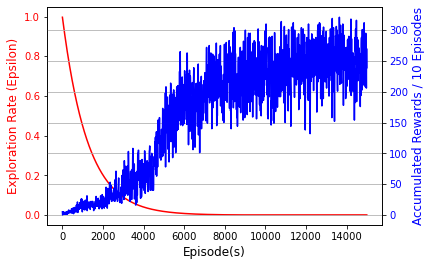

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax1 = plt.subplots() 

ax1.set_xlabel('Episode(s)', fontsize=12) 
ax1.set_ylabel('Exploration Rate (Epsilon)', fontsize=12, color = 'red') 
ax1.plot(t2, epsilon, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
# Adding Twin Axes
ax2 = ax1.twinx() 
ax2.set_ylabel('Accumulated Rewards / 10 Episodes', fontsize=12, color = 'blue') 
ax2.plot(t2, average_accumulated_rewards, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
# Show plot
#plt.title('The Accumulated Rewards of 10 by 10 Grid-world Simulation (label uncertainty Pl = 1.0)', fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [8, 5]
plt.show()

In [5]:
Path = csrl.verify_DRQN(EPISODES=10, num_steps=70, state_sequence_size=7, label_sequence_size=3)

D:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


START state: (0, 0, 4, 7)
action: 0
reward0.0
state: (0, 0, 3, 7)
action: 3
reward0.0
state: (0, 0, 3, 6)
action: 2
reward0.0
state: (0, 0, 3, 7)
action: 0
reward0.0
state: (0, 0, 2, 7)
action: 1
reward0.0
state: (0, 0, 2, 6)
action: 1
reward0.0
state: (0, 0, 3, 6)
action: 0
reward0.0
state: (0, 0, 2, 6)
action: 2
reward0.0
state: (0, 0, 2, 7)
action: 2
reward0.0
state: (0, 0, 2, 8)
action: 0
reward0.0
state: (0, 0, 1, 8)
action: 3
reward0.0
state: (0, 0, 2, 8)
action: 0
reward0.0
state: (0, 0, 1, 8)
action: 1
reward0.0
state: (0, 0, 1, 7)
action: 2
reward0.0
state: (0, 0, 1, 8)
action: 1
reward0.0
state: (0, 0, 2, 8)
action: 1
reward0.0
state: (0, 0, 3, 8)
action: 1
reward0.0
state: (0, 0, 4, 8)
action: 1
reward0.0
state: (0, 0, 5, 8)
action: 1
reward0.0
state: (0, 0, 5, 9)
action: 1
reward0.0
state: (0, 0, 6, 9)
action: 3
reward0.0
state: (0, 0, 6, 8)
action: 3
reward0.0
state: (0, 0, 6, 7)
action: 1
reward0.0
state: (0, 0, 7, 7)
action: 3
reward0.0
state: (0, 0, 7, 6)
action: 3
rewa

D:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


action: 0
reward0.0
state: (0, 1, 4, 0)
action: 0
reward0.0
state: (0, 1, 3, 0)
action: 2
reward0.0
state: (0, 1, 3, 1)
action: 0
reward0.0
state: (0, 1, 2, 1)
action: 2
reward0.0
state: (0, 1, 2, 2)
action: 2
reward0.0
state: (0, 1, 2, 3)
action: 2
reward0.0
state: (0, 1, 2, 4)
action: 2
reward0.0
state: (0, 1, 2, 5)
action: 2
reward0.0
state: (0, 1, 2, 6)
action: 2
reward0.0
state: (0, 1, 2, 7)
action: 2
reward0.0
state: (0, 1, 2, 8)
action: 0
dynamic event occurrenced !
reward0.0
state: (0, 1, 1, 8)
action: 2
reward10.0
state: (0, 1, 1, 9)
action: 0
reward0.0
state: (0, 0, 0, 9)
action: 1
reward0.0
state: (0, 0, 1, 9)
action: 1
reward0.0
state: (0, 0, 1, 8)
action: 3
reward0.0
state: (0, 0, 0, 8)
action: 3
reward0.0
state: (0, 0, 1, 8)
action: 3
reward0.0
state: (0, 0, 1, 7)
action: 2
reward0.0
state: (0, 0, 1, 8)
action: 1
reward0.0
state: (0, 0, 2, 8)
action: 1
reward0.0
state: (0, 0, 3, 8)
action: 1
reward0.0
state: (0, 0, 4, 8)
action: 1
reward0.0
state: (0, 0, 5, 8)
action: 1
r

action: 3
reward0.0
state: (0, 0, 6, 7)
action: 3
reward0.0
state: (0, 0, 6, 6)
action: 1
reward0.0
state: (0, 0, 7, 6)
action: 3
reward0.0
state: (0, 0, 7, 5)
action: 3
reward0.0
state: (0, 0, 7, 4)
action: 3
reward0.0
state: (0, 0, 6, 4)
action: 1
reward0.0
state: (0, 0, 6, 3)
action: 1
reward0.0
state: (0, 0, 7, 3)
action: 3
reward0.0
state: (0, 0, 7, 2)
action: 3
reward0.0
state: (0, 0, 7, 1)
action: 1
dynamic event occurrenced !
reward0.0
state: (0, 0, 8, 1)
action: 3
reward10.0
state: (0, 0, 8, 0)
action: 3
reward0.0
state: (0, 1, 8, 0)
action: 0
reward0.0
state: (0, 1, 7, 0)
action: 0
reward0.0
state: (0, 1, 6, 0)
action: 0
reward0.0
state: (0, 1, 6, 1)
action: 0
reward0.0
state: (0, 1, 5, 1)
action: 0
reward0.0
state: (0, 1, 4, 1)
action: 0
reward0.0
state: (0, 1, 3, 1)
action: 2
reward0.0
state: (0, 1, 3, 2)
action: 0
reward0.0
state: (0, 1, 2, 2)
action: 2
reward0.0
state: (0, 1, 2, 3)
action: 2
reward0.0
state: (0, 1, 3, 3)
action: 0
reward0.0
state: (0, 1, 2, 3)
action: 2
r

action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 8)
action: 0
reward0.0
state: (0, 2, 0, 9)
action: 0
reward0.0
state: (0, 2, 0, 9)
action: 0
reward0.0
state: (0, 2, 0, 9)
action: 0
reward0.0
state: (0, 2, 0, 9)
action: 0
reward0.0
state: (0, 2, 0, 9)
action: 0
reward0.0
state: (0, 2, 0, 9)
action: 0
reward0.0
state: (0, 2, 0, 9)
